# The two decision classification - Parkinson's

## What is Parkinson?

Parkinsons’ disease - the shaking Palsy
A disorder of the central nervous system that affects movement, often including tremors.
Nerve cell damage in the brain causes dopamine levels to drop, leading to the symptoms of Parkinson's.


Detecting the early onset of this disease is crucial.

This is a classification case at the root.
We can also see how the other attributes affect the status and by visualizing and preparing the data,we can see how Parkinsons’ can be identified at home.It may be a long stretch but if my model can identify when it is the time to pay the doctor a visit,I’ll be more than happy.

I would like to include the basic ways where you can determine at home whether you see an early onset of Parkinsons’ or just a medical side effect of some tablet or pill.

### Importing the necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset

In the data given,two files are present: parkinsons.csv and parkinson names which is a brief description of the data.

In [2]:
data=pd.read_csv('parkinsons.csv')
desc=open('/kaggle/input/parkinsonsdataset/parkinsons.names')

In [3]:
print(desc.read())

Title: Parkinsons Disease Data Set

-----------------------------------------------------	

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A


-----------------------------------------------------

Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) -

## Understanding the data
The data for this study consists of 195 sustained vowel phonation from 31 people, of which 23 were diagnosed with PD [5, 7, 8]. The essential aim of processing the data is to discriminate healthy people from those with PD,
According to the ”status” attribute which is set to non-PD for healthy and PD for people with Parkinson‟s disease,which is a two-decision classiﬁcation problem.

The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

According to the information :
* The dataset conatins 24 attributes.
* 22 are float data types 
* Status i.e. the target variable is the only integer variable here.
* Name is the only object variable.
* The data we deal with is mostly numerical.

The dataset has no missing data values.

In [5]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
data_summary = data.describe()
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


## EDA with numerical features

The exploratory data analysis is conducted in the following order:
* Analysis of the target variable
* Correlation
* Listing highly correlated features
* Profile Report

In [7]:
numerical = data.select_dtypes(exclude=['object','int']).columns

### Analysis of the target variable

Out of the 195 data rows,147 have PD and 48 people are healthy.The distribution is not uniform.Out of the 195 data rows,147 have PD and 48 people are healthy.The distribution is not uniform.

This is a 75-25 dataset with 75% people having PD and 25% don't.

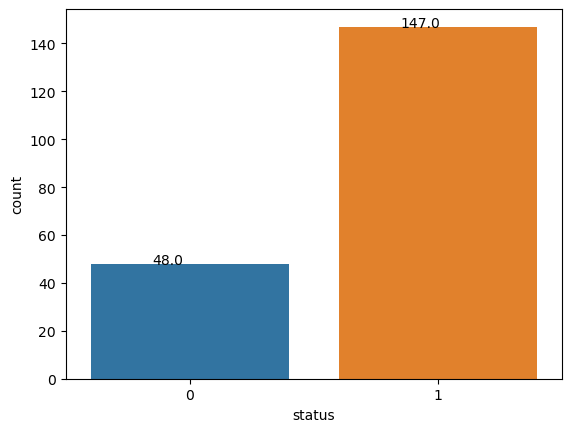

In [8]:
ax = sns.countplot(x="status", data=data)

for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

### Correlation
The pearson correlation is visualised with a barplot and a heatmap.
The heatmap shows lot of correlations among the features.

<Axes: >

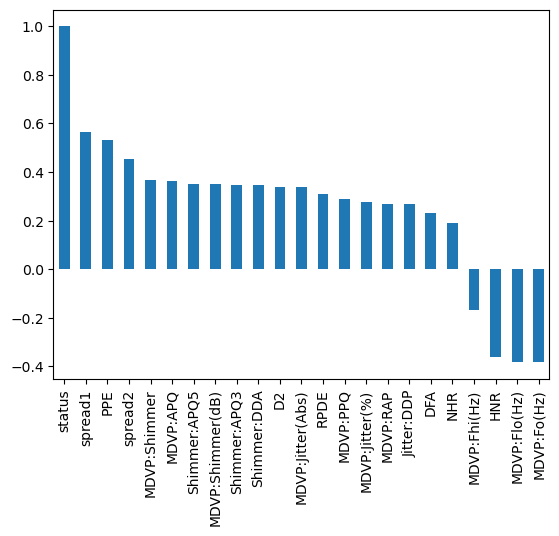

In [9]:
plt.figure()
data.corr(method='pearson',numeric_only=True)['status'].sort_values(ascending=False).plot(kind='bar')

/tmp/ipykernel_32/2019623370.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,annot_kws={'size':4})


<Axes: >

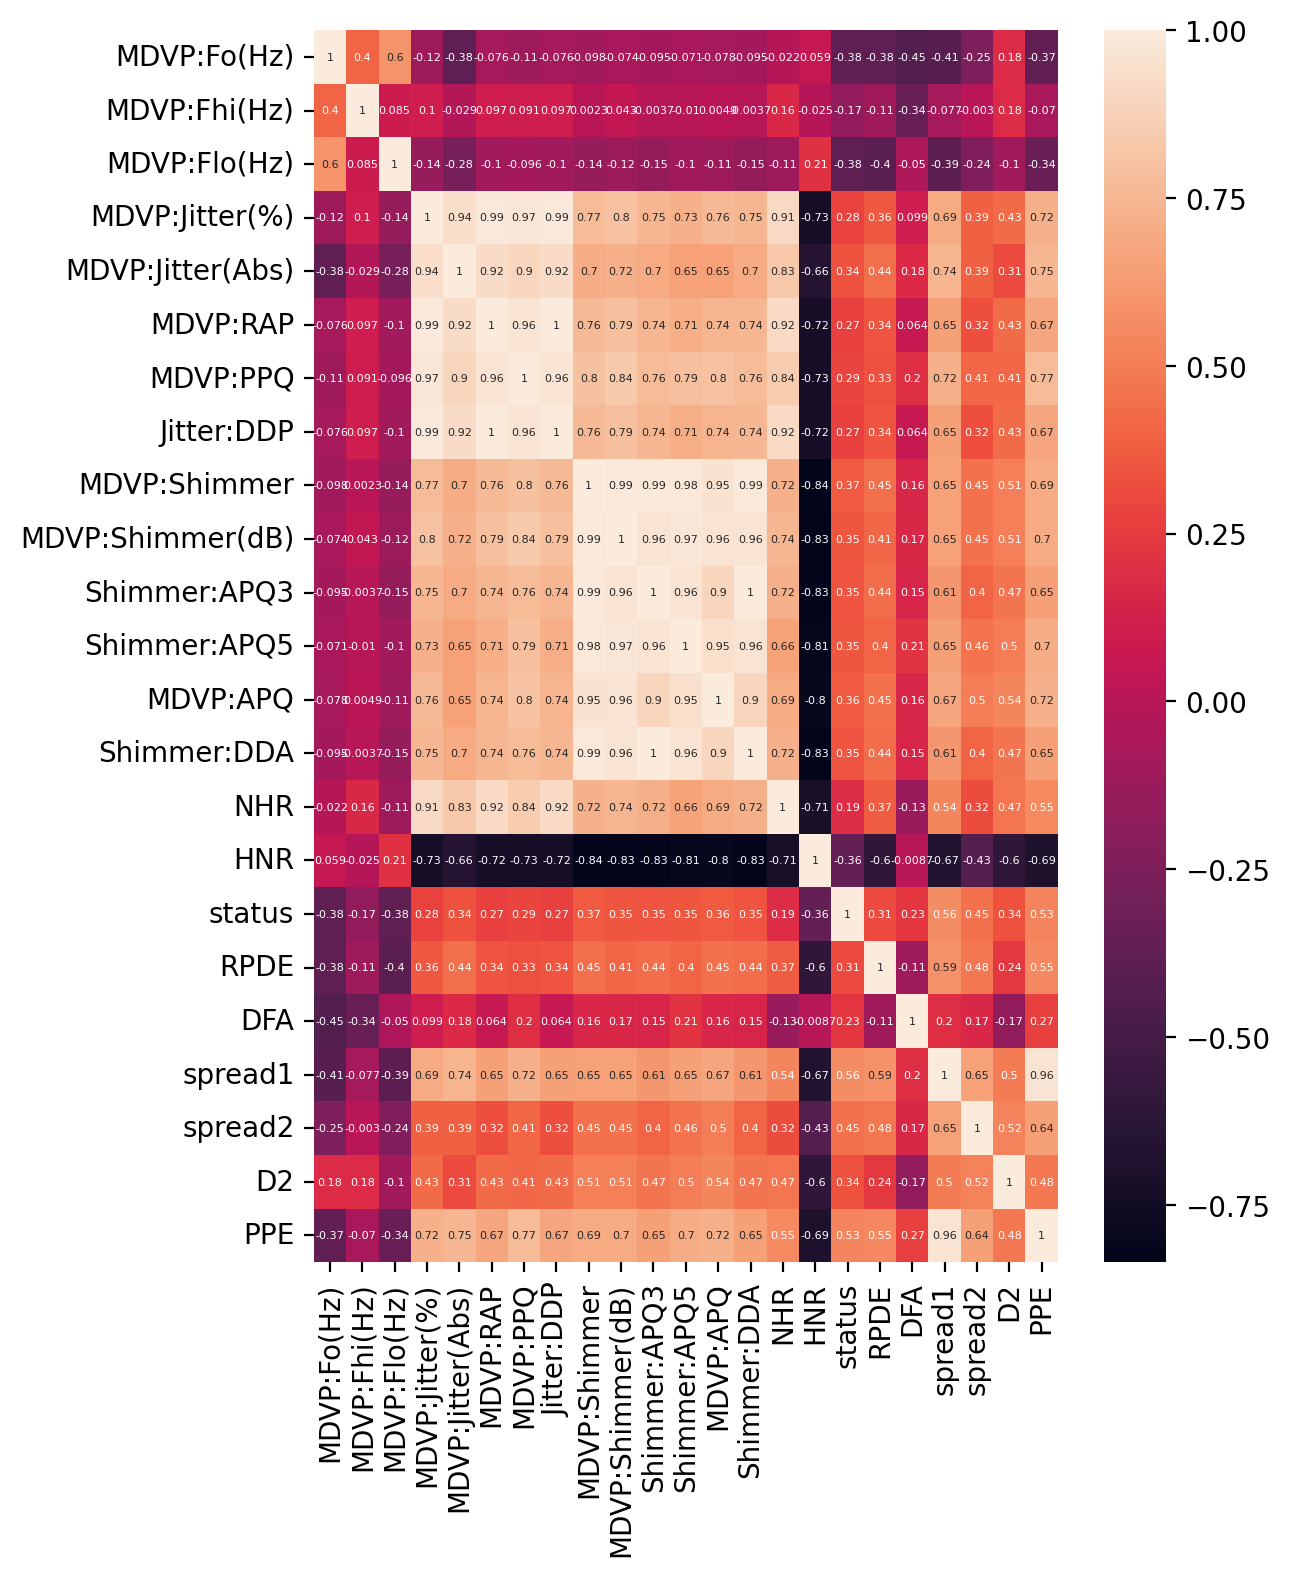

In [10]:
plt.figure(figsize=(6,8),dpi=200)
sns.heatmap(data.corr(),annot=True,annot_kws={'size':4})

None of the features may be highly correlated to the 'status' but the features are highly correlated among themselves.This can uncover some important information and single out features by PCA.

### Listing highly correlated features 

Many features are highly correlated with each other.Because of this,the performance of the model will be impacted by a problem called — “Multicollinearity”.
    
This can lead to skewed or misleading results. Algoriths like decision trees and boosted trees algorithms are immune to multicollinearity by nature. 

In [11]:
 corr=data.corr()

/tmp/ipykernel_32/2317304045.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


In [12]:
indices = np.where(corr > 0.95)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

In [13]:
indices

[('MDVP:Jitter(%)', 'MDVP:RAP'),
 ('MDVP:Jitter(%)', 'MDVP:PPQ'),
 ('MDVP:Jitter(%)', 'Jitter:DDP'),
 ('MDVP:RAP', 'MDVP:PPQ'),
 ('MDVP:RAP', 'Jitter:DDP'),
 ('MDVP:PPQ', 'Jitter:DDP'),
 ('MDVP:Shimmer', 'MDVP:Shimmer(dB)'),
 ('MDVP:Shimmer', 'Shimmer:APQ3'),
 ('MDVP:Shimmer', 'Shimmer:APQ5'),
 ('MDVP:Shimmer', 'MDVP:APQ'),
 ('MDVP:Shimmer', 'Shimmer:DDA'),
 ('MDVP:Shimmer(dB)', 'Shimmer:APQ3'),
 ('MDVP:Shimmer(dB)', 'Shimmer:APQ5'),
 ('MDVP:Shimmer(dB)', 'MDVP:APQ'),
 ('MDVP:Shimmer(dB)', 'Shimmer:DDA'),
 ('Shimmer:APQ3', 'Shimmer:APQ5'),
 ('Shimmer:APQ3', 'Shimmer:DDA'),
 ('Shimmer:APQ5', 'Shimmer:DDA'),
 ('spread1', 'PPE')]

In [14]:
upper=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

/tmp/ipykernel_32/1282924257.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


In [15]:
to_drop=[col for col in upper.columns if any(upper[col]>0.95)]
to_drop

['MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'PPE']

According to correlation matrix where the threshold is considered to be above 0.95,the following features are found:
1. 'MDVP:RAP'
1. 'MDVP:PPQ'
1. 'Jitter:DDP'
1. 'MDVP:Shimmer(dB)'
1. 'Shimmer:APQ3'
1. 'Shimmer:APQ5'
1. 'MDVP:APQ'
1. 'Shimmer:DDA'
1. 'PPE'

### Profile Report

In [16]:
#from pandas_profiling import ProfileReport
#profile=ProfileReport(data,title='Profile Report',explorative=True)

In [17]:
#profile.to_file('eda.html')

## Univariate analysis
The next part of the EDA includes univariate analysis:

### Visualising all the features
The distributions of all the features are visualised below with the use of a boxplot and a histogram

In [18]:
data_num=data.drop(['name','status'],axis=1)

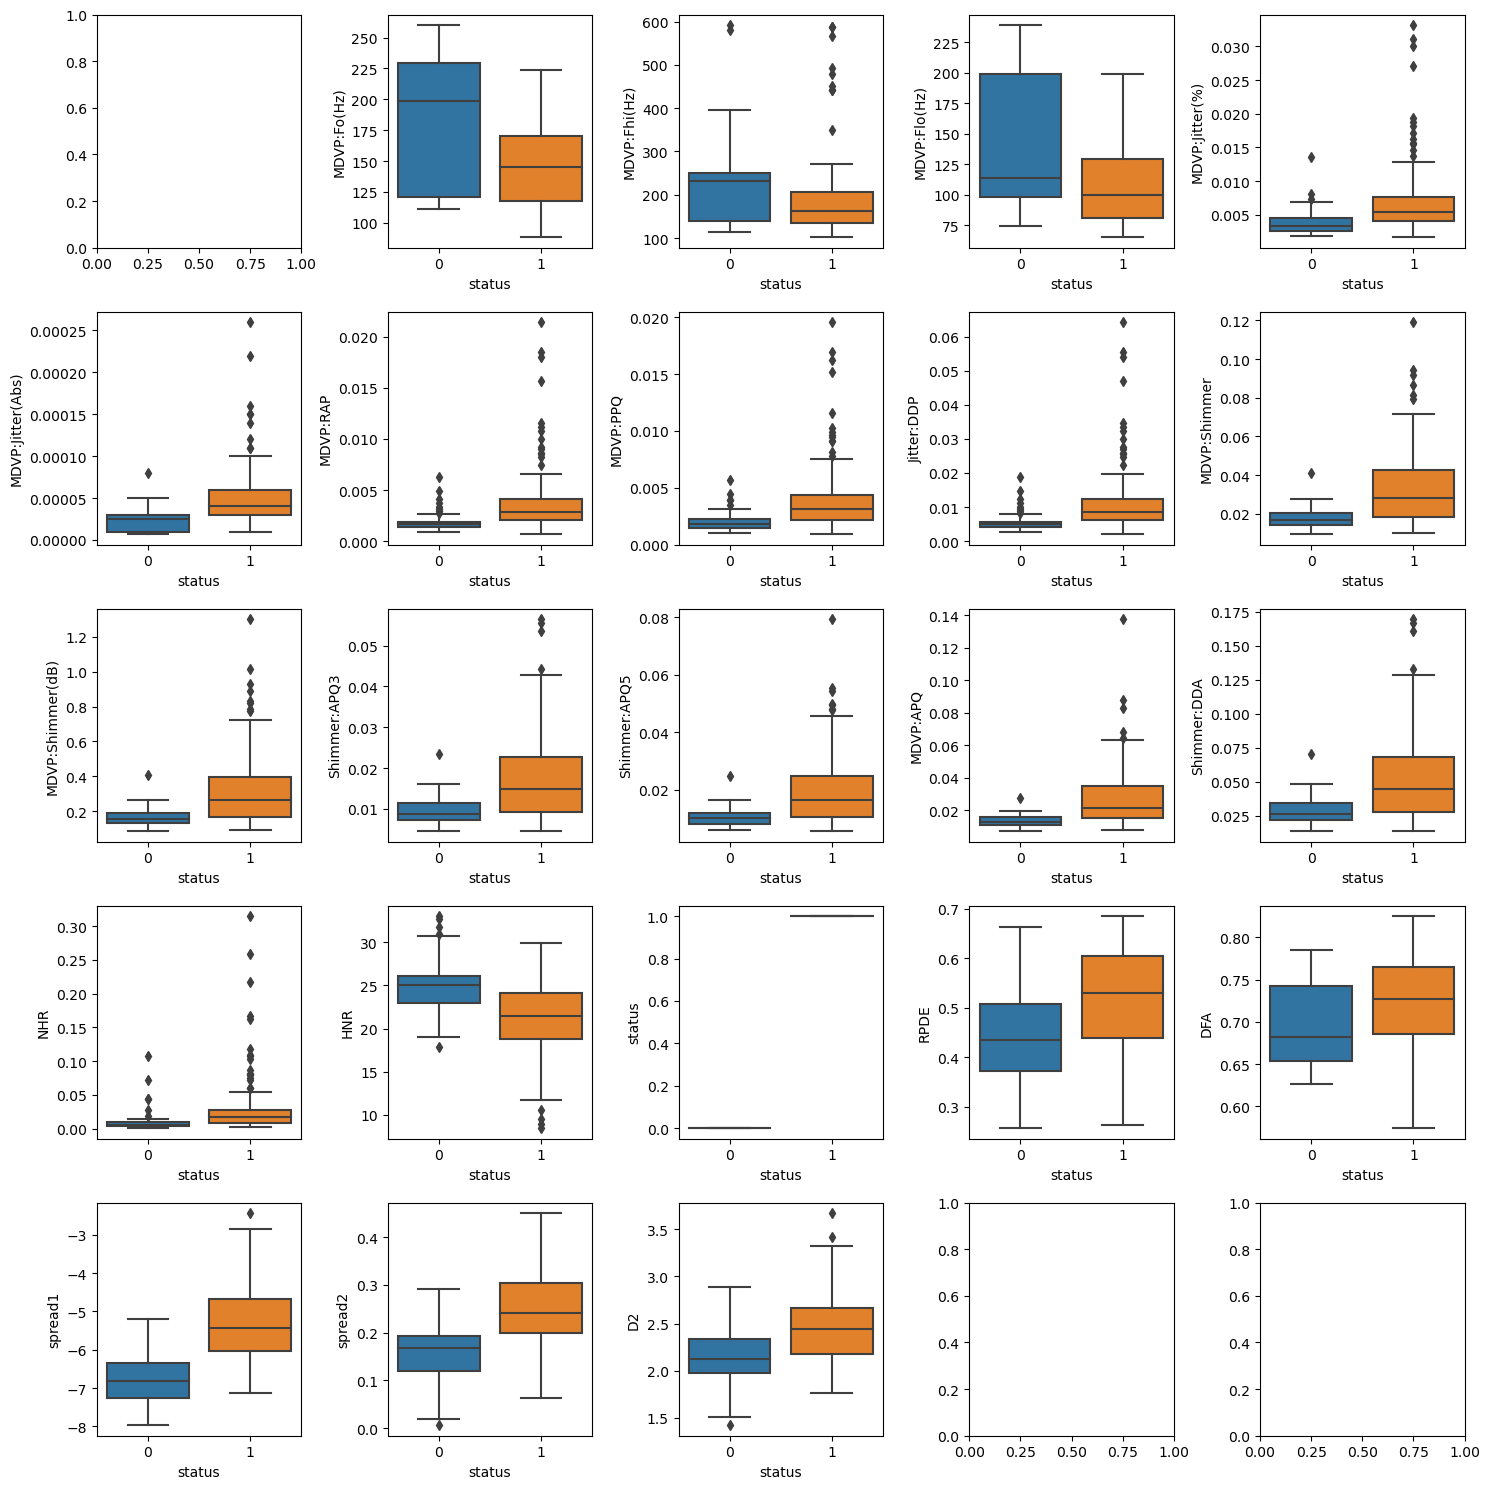

In [19]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(data.columns)-1):
    sns.boxplot(x='status',y=data.iloc[:,i],data=data,orient='v',ax=axes[i])
plt.tight_layout()
plt.show();

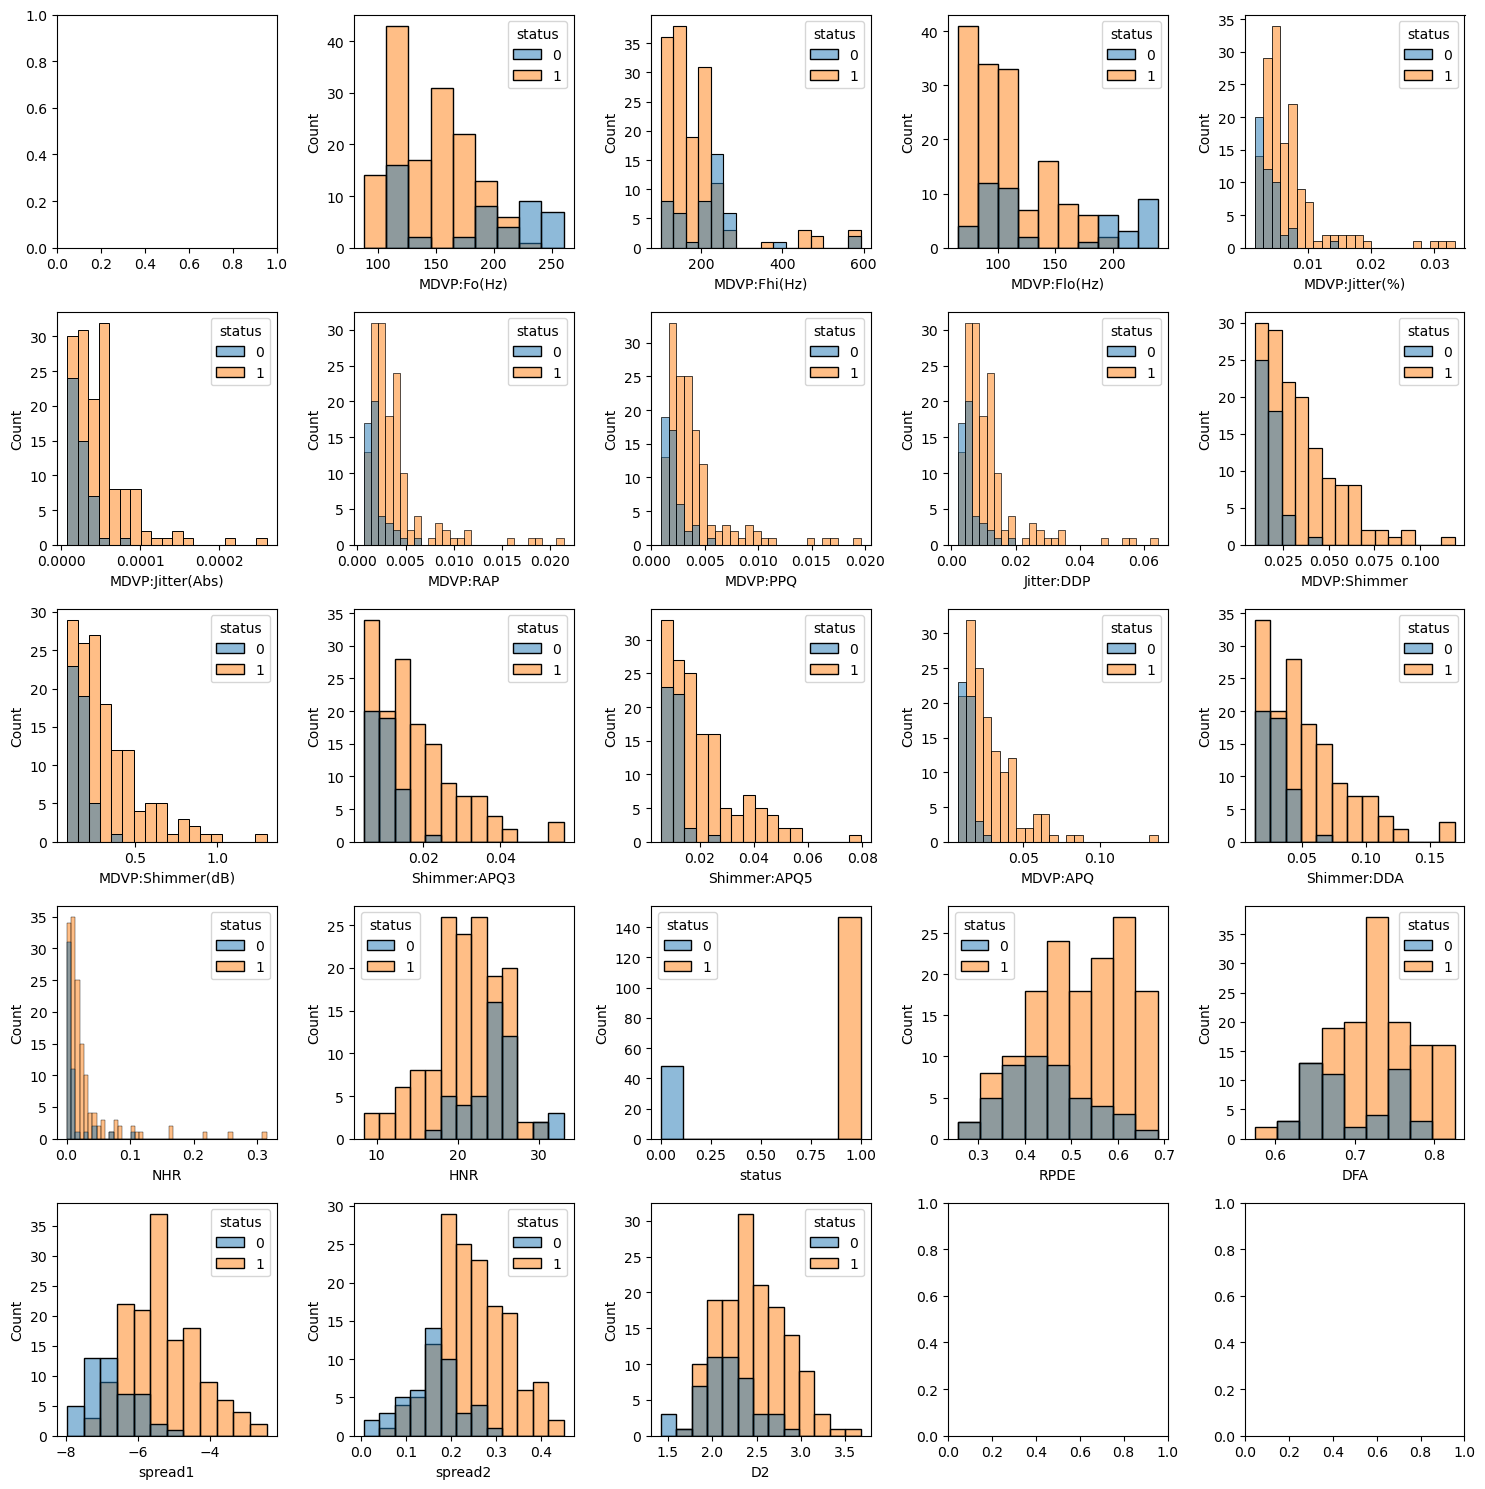

In [20]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(data.columns)-1):
    sns.histplot(hue='status',x=data.iloc[:,i],data=data,ax=axes[i])
plt.tight_layout()
plt.show();

## Skewness and Kurtosis of the distributions 

### Comparing the frequency levels obtained

The three features which contain frequency levels include :
1. MDVP:Fo(Hz) - Average vocal fundamental frequency
1. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
1. MDVP:Flo(Hz) - Minimum vocal fundamental frequency

To further analyse them according to their statistics,we can write up a function to plot them and visually understand where the points lie.

In [21]:
def plot_axvlines(plt,col) :
    #histograms and boxplots
    
    mean = data_summary.loc["mean", col]
    q1 = data_summary.loc["25%", col]
    q2 = data_summary.loc["50%", col]
    q3 = data_summary.loc["75%", col]
    plt.axvline(mean, color = "green");              # Plotting a line to mark the mean 
    plt.axvline(q1, color = "blue");                # Plotting a line to mark Q1 
    plt.axvline(q2, color = "yellow");             # Plotting a line to mark Q2 
    plt.axvline(q3, color = "orange");           # Plotting a line to mark Q3
    plt.legend({"Mean": mean, "25%" : q1, "50%" : q2, "75%" : q3});


In [22]:
def plot(i):
    fig, axes = plt.subplots(nrows=1,ncols= 2, figsize = (15,5));
    sns.boxplot(data=data,x='status',y=i, color = "mediumslateblue",ax=axes[0]);
    axes[0].set(xlabel = i);

    pp= sns.histplot(data=data,x=i, bins = 10,kde=True, color = "mediumslateblue",ax=axes[1]);
    axes[1].set(xlabel = i);
    plot_axvlines(axes[1],i);

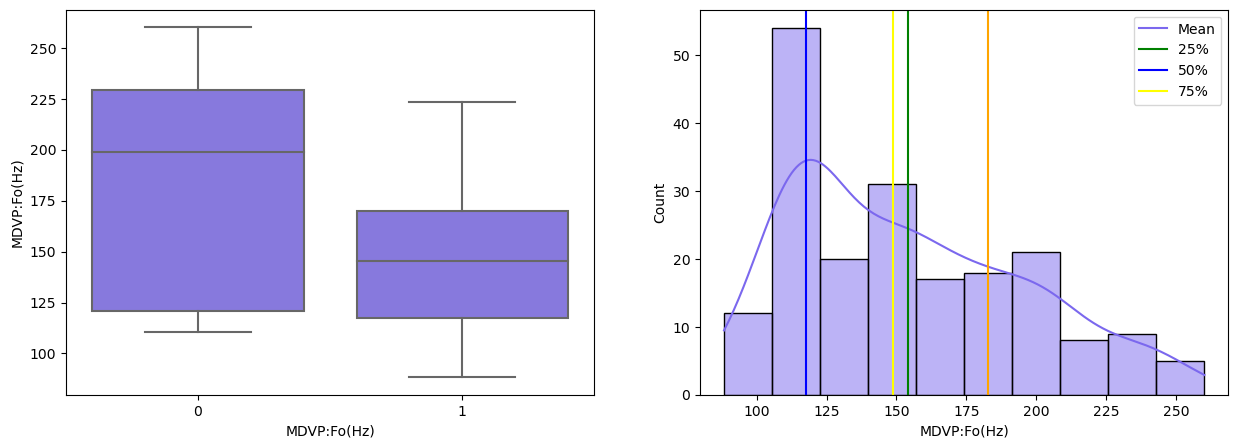

In [23]:
plot('MDVP:Fo(Hz)')

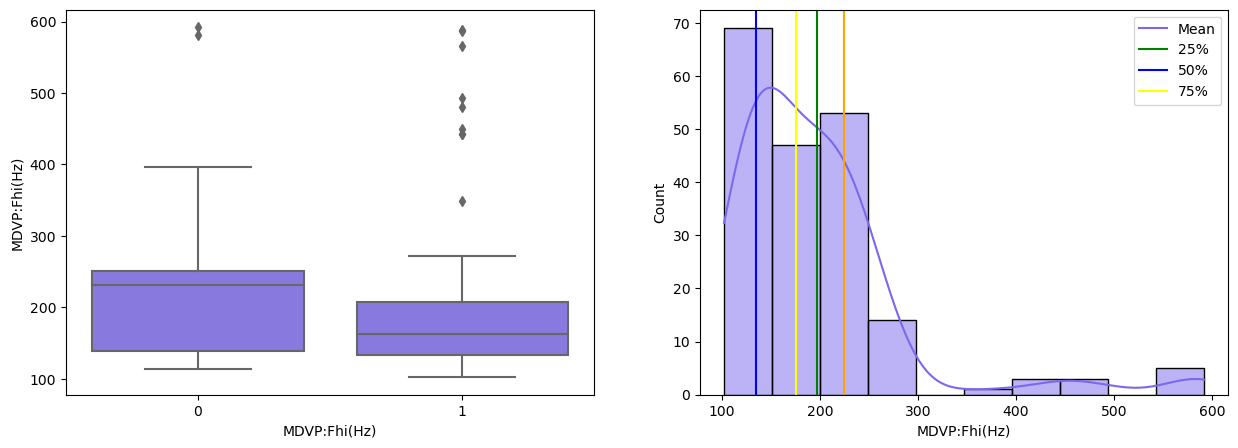

In [24]:
plot('MDVP:Fhi(Hz)')

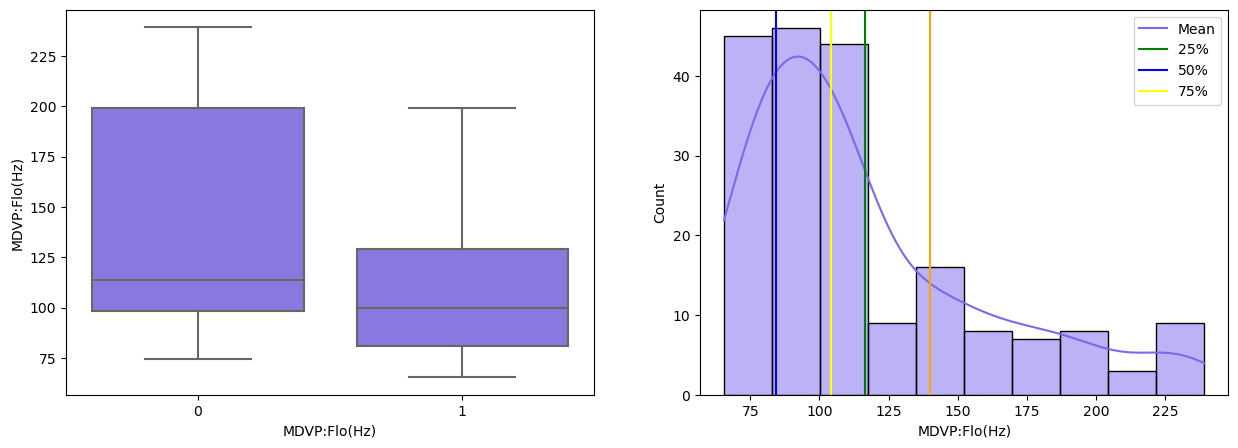

In [25]:
plot('MDVP:Flo(Hz)')

After diving deep into visualising and understanding our data distributions,the next step would be to zero down on a few features to prevent Multicollinearity.We could take a look at the most important features needed while identifying symptoms and classifying PD.

## Skewness of the dataset

In [26]:
data.skew()

/tmp/ipykernel_32/1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

The values with skewness and how to analyse them:
* Skewness >1 : moderate right skewness
* Skewness <-1 : moderate left skewness
* Skewness >2 : severe right skewness
* Skewness <-2 : severe right skewness

Skewness>2
* MDVP:Fhi(Hz)         
* MDVP:Jitter(%)       
* MDVP:Jitter(Abs)     
* MDVP:RAP             
* MDVP:PPQ             
* Jitter:DDP           
* MDVP:APQ             
* NHR             

Skewness <-2 : NONE

In [27]:
data.skew()>2

/tmp/ipykernel_32/4133322117.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()>2


MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)         True
MDVP:Flo(Hz)        False
MDVP:Jitter(%)       True
MDVP:Jitter(Abs)     True
MDVP:RAP             True
MDVP:PPQ             True
Jitter:DDP           True
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ             True
Shimmer:DDA         False
NHR                  True
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [28]:
data.skew()<-2

/tmp/ipykernel_32/2534605771.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()<-2


MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [29]:
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis

In [30]:
skew(data['status'])

-1.1785714285714286

## Kurtosis of the dataset

It provides insights on the degree of peakness of a frequency distribution.

A normal distribution has a kurtosis 3 (known as mesokurtic). The distributions that are greater than 3 are leptokurtic, and those lower than 3 are platykurtic. The higher the values, the higher the peak, and kurtosis will range from 1 to infinity.

In [31]:
data.kurtosis()

/tmp/ipykernel_32/2361870383.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()


MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

In [32]:
data.kurtosis()>3

/tmp/ipykernel_32/1726072388.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()>3


MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)         True
MDVP:Flo(Hz)        False
MDVP:Jitter(%)       True
MDVP:Jitter(Abs)     True
MDVP:RAP             True
MDVP:PPQ             True
Jitter:DDP           True
MDVP:Shimmer         True
MDVP:Shimmer(dB)     True
Shimmer:APQ3        False
Shimmer:APQ5         True
MDVP:APQ             True
Shimmer:DDA         False
NHR                  True
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [33]:
data.kurtosis()<3

/tmp/ipykernel_32/774695528.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()<3


MDVP:Fo(Hz)          True
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)         True
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3         True
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA          True
NHR                 False
HNR                  True
status               True
RPDE                 True
DFA                  True
spread1              True
spread2              True
D2                   True
PPE                  True
dtype: bool

In [34]:
kurtosis(data['status'], fisher=True)

-0.6109693877551026

## Feature selection techniques

1. Variance Threshold
1. Mutual Information
1. Information Gain

In [35]:
from sklearn.feature_selection import VarianceThreshold

In [36]:
var_thres=VarianceThreshold(threshold=0.005)
var_thres.fit(data.drop('name',axis=1))
var_thres.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True])

In [37]:
data.drop('name',axis=1).columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [38]:
pd.DataFrame(data=var_thres.get_support(), index=data.drop('name',axis=1).columns,columns=['Not dropped'])

,Not dropped
MDVP:Fo(Hz),True
MDVP:Fhi(Hz),True
MDVP:Flo(Hz),True
MDVP:Jitter(%),False
MDVP:Jitter(Abs),False
MDVP:RAP,False
MDVP:PPQ,False
Jitter:DDP,False
MDVP:Shimmer,False
MDVP:Shimmer(dB),True


## Feature transfromation: Boxcox and reciprocal
Often, Box-Cox is used to increase the Gaussianity of data. This can help in some special cases; however, we observed that transformations that do not maximize the Gaussianity of the data are often superior for classification accuracy. Additionally,it has been shown that the Gaussianity of datasets is not critical and by allowing the effect of the Box–Cox transformation work in operational ranges that do not necessarily correspond to an increase in Gaussianity, they have shown that class separability can be improved.


In [39]:
import scipy.stats as stat
import pylab

In [40]:
def plt_qq(df,feature):
    plt.figure(figsize=(15,5),dpi=200)
    plt.suptitle(feature)
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show();

In [41]:
for i in numerical:
    data[i+'_Boxcox'],parameters=stat.boxcox(data[i])

ValueError: Data must be positive.

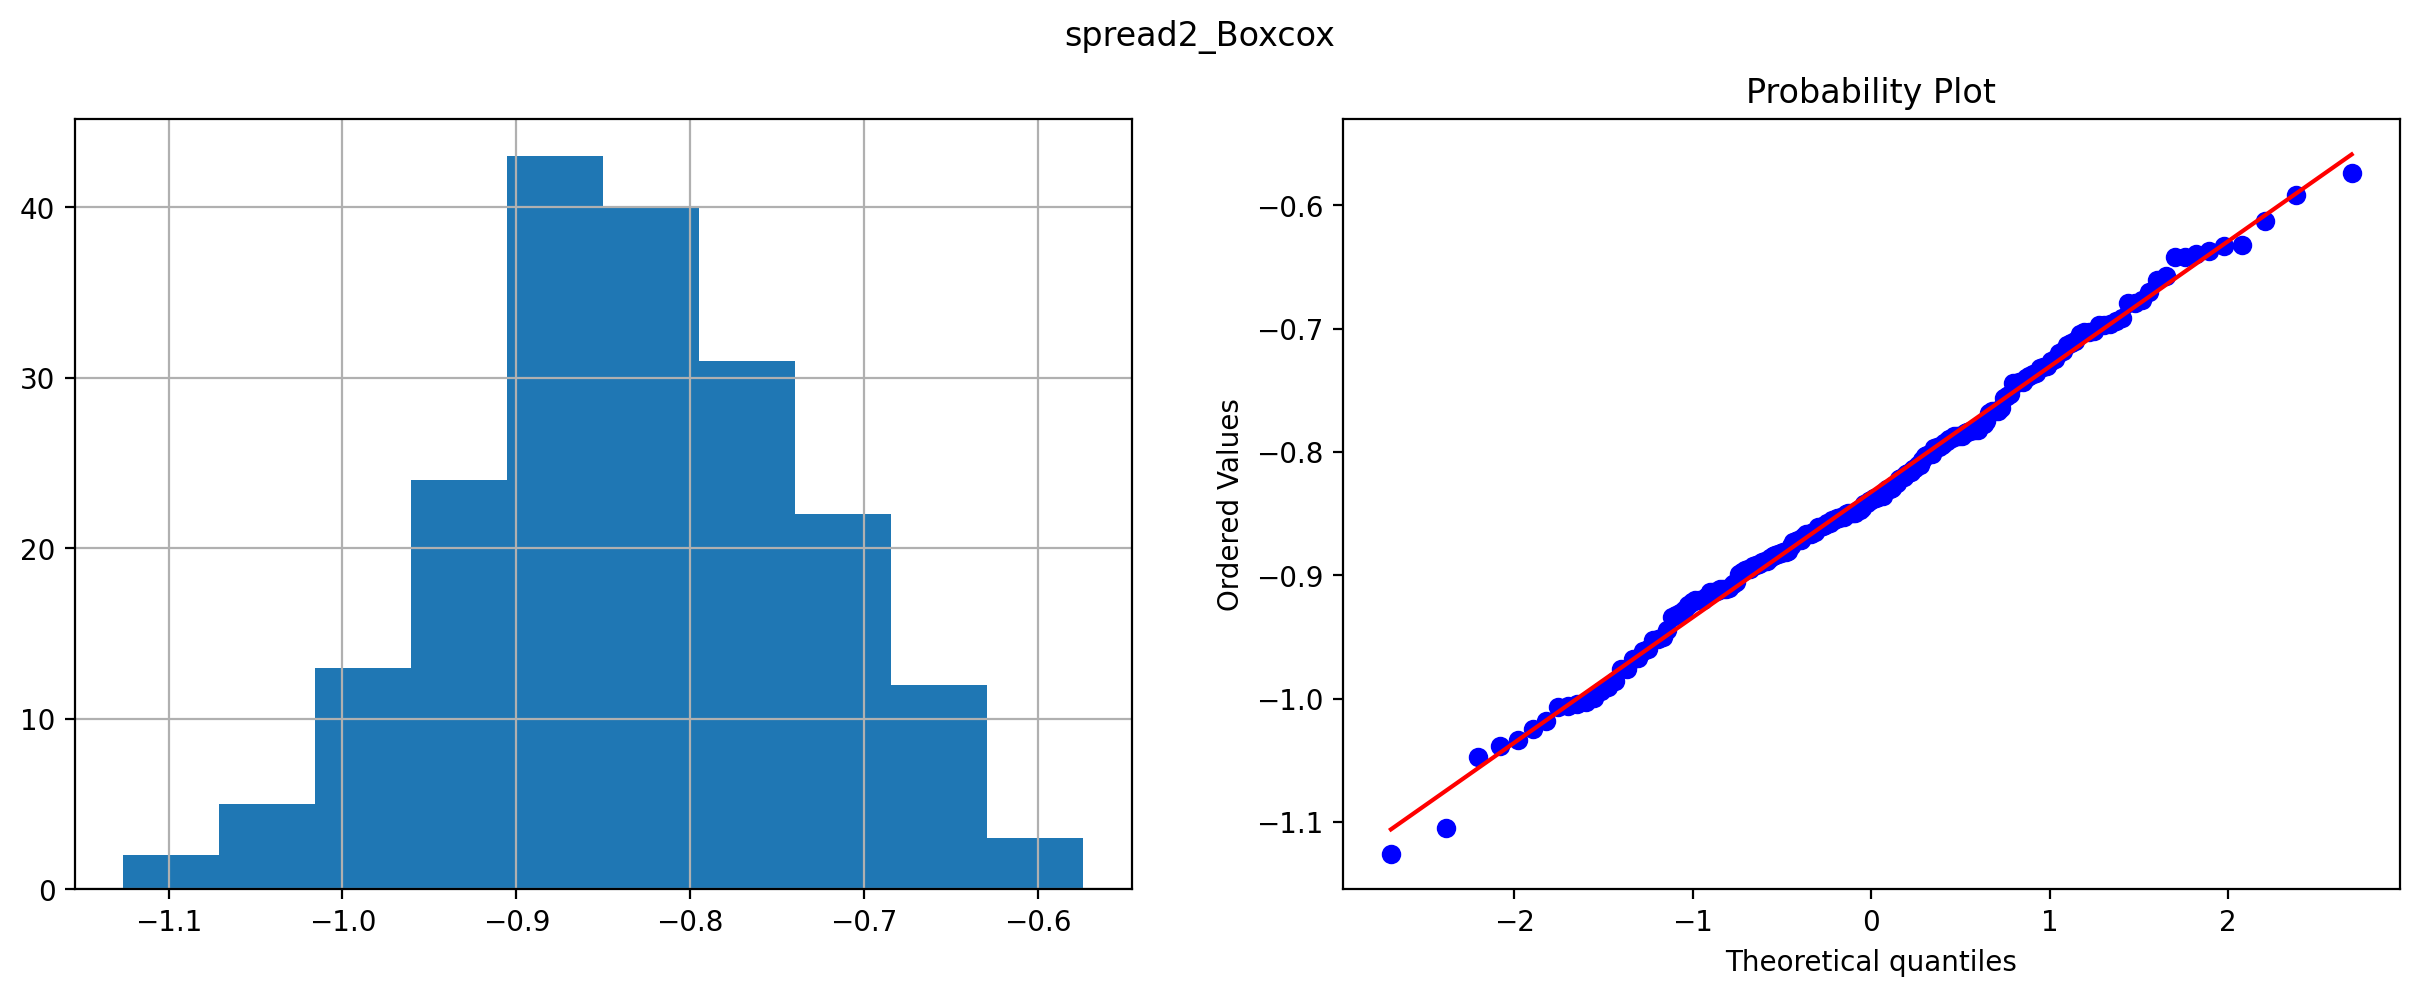

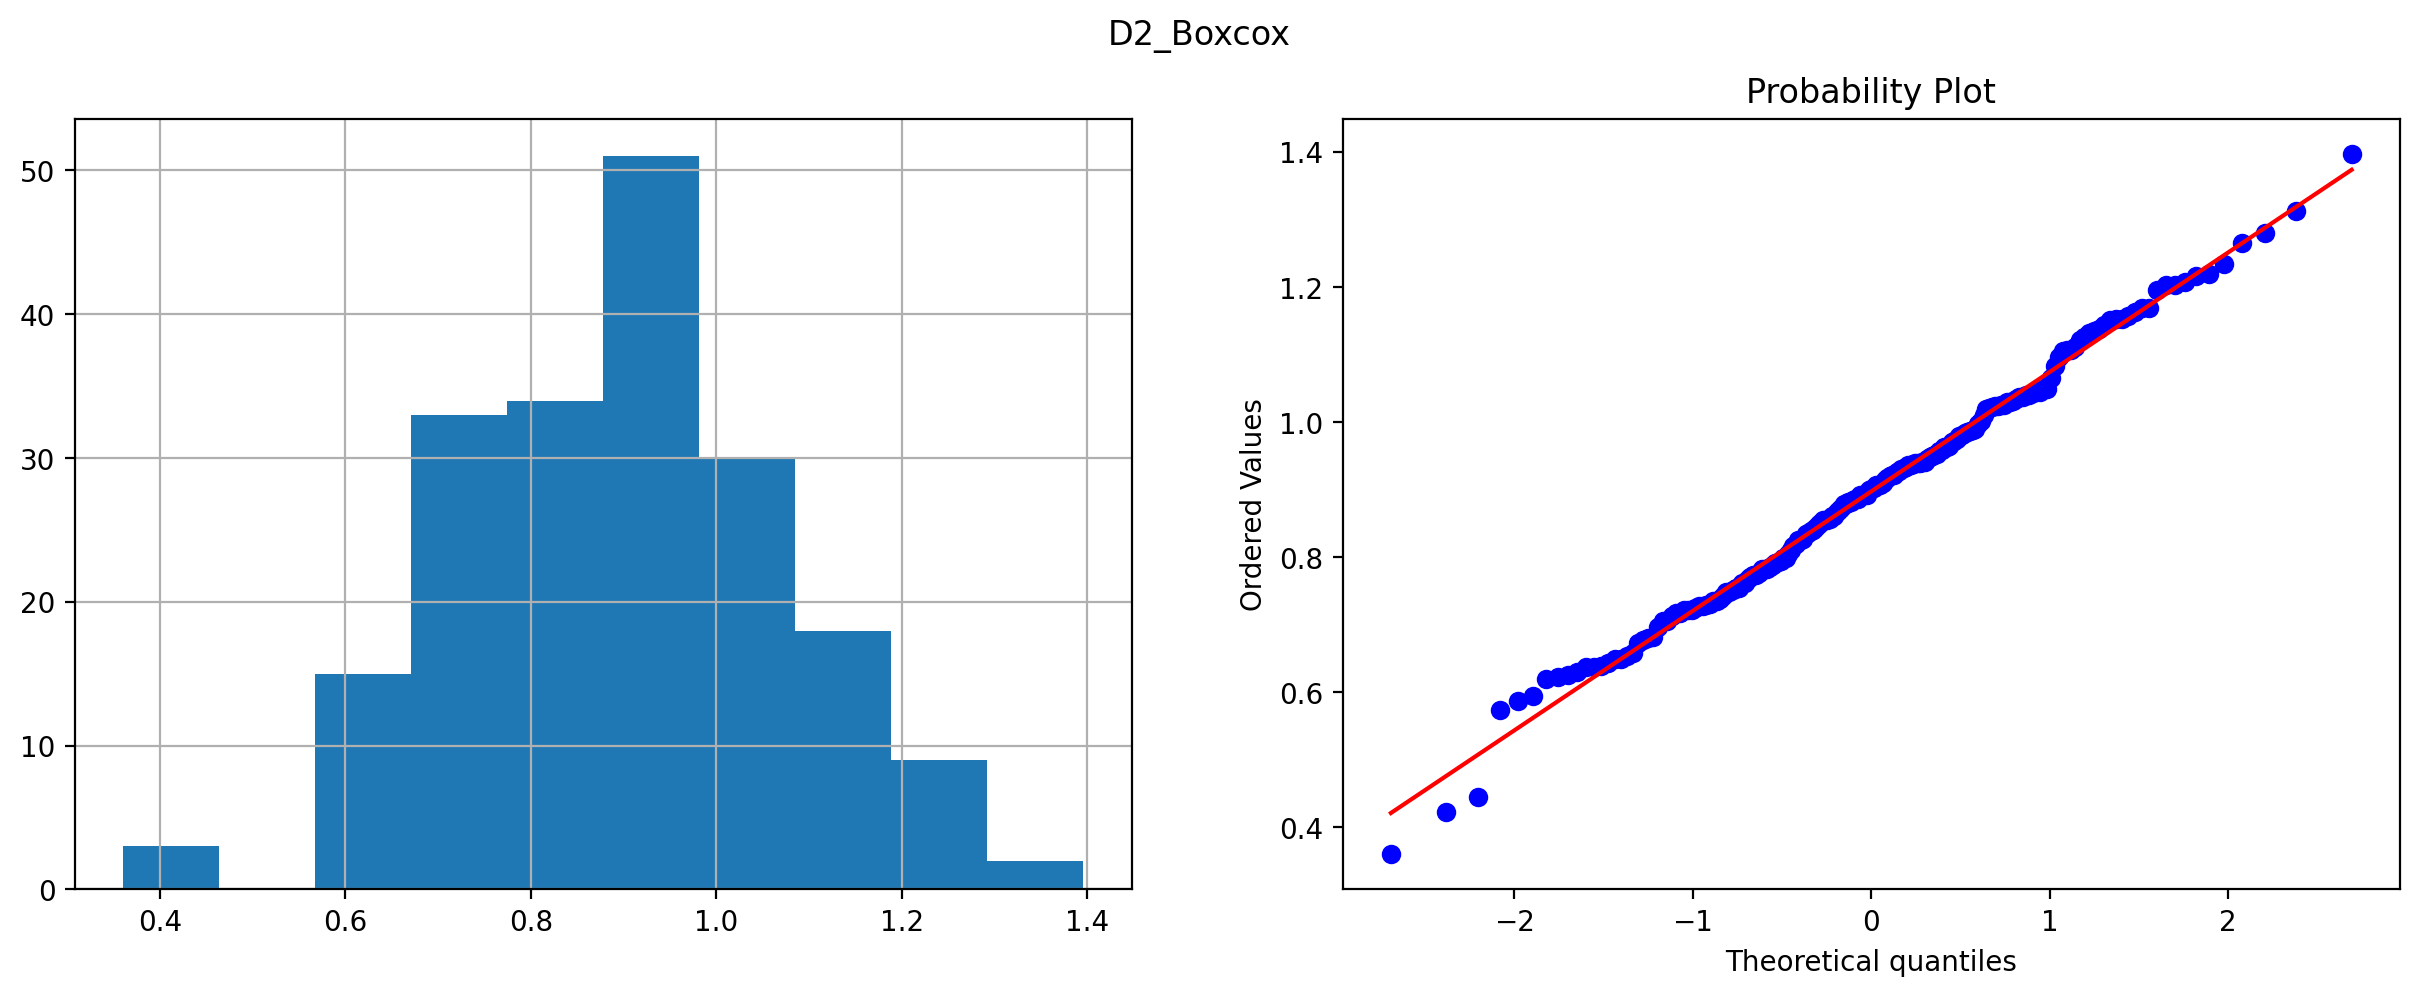

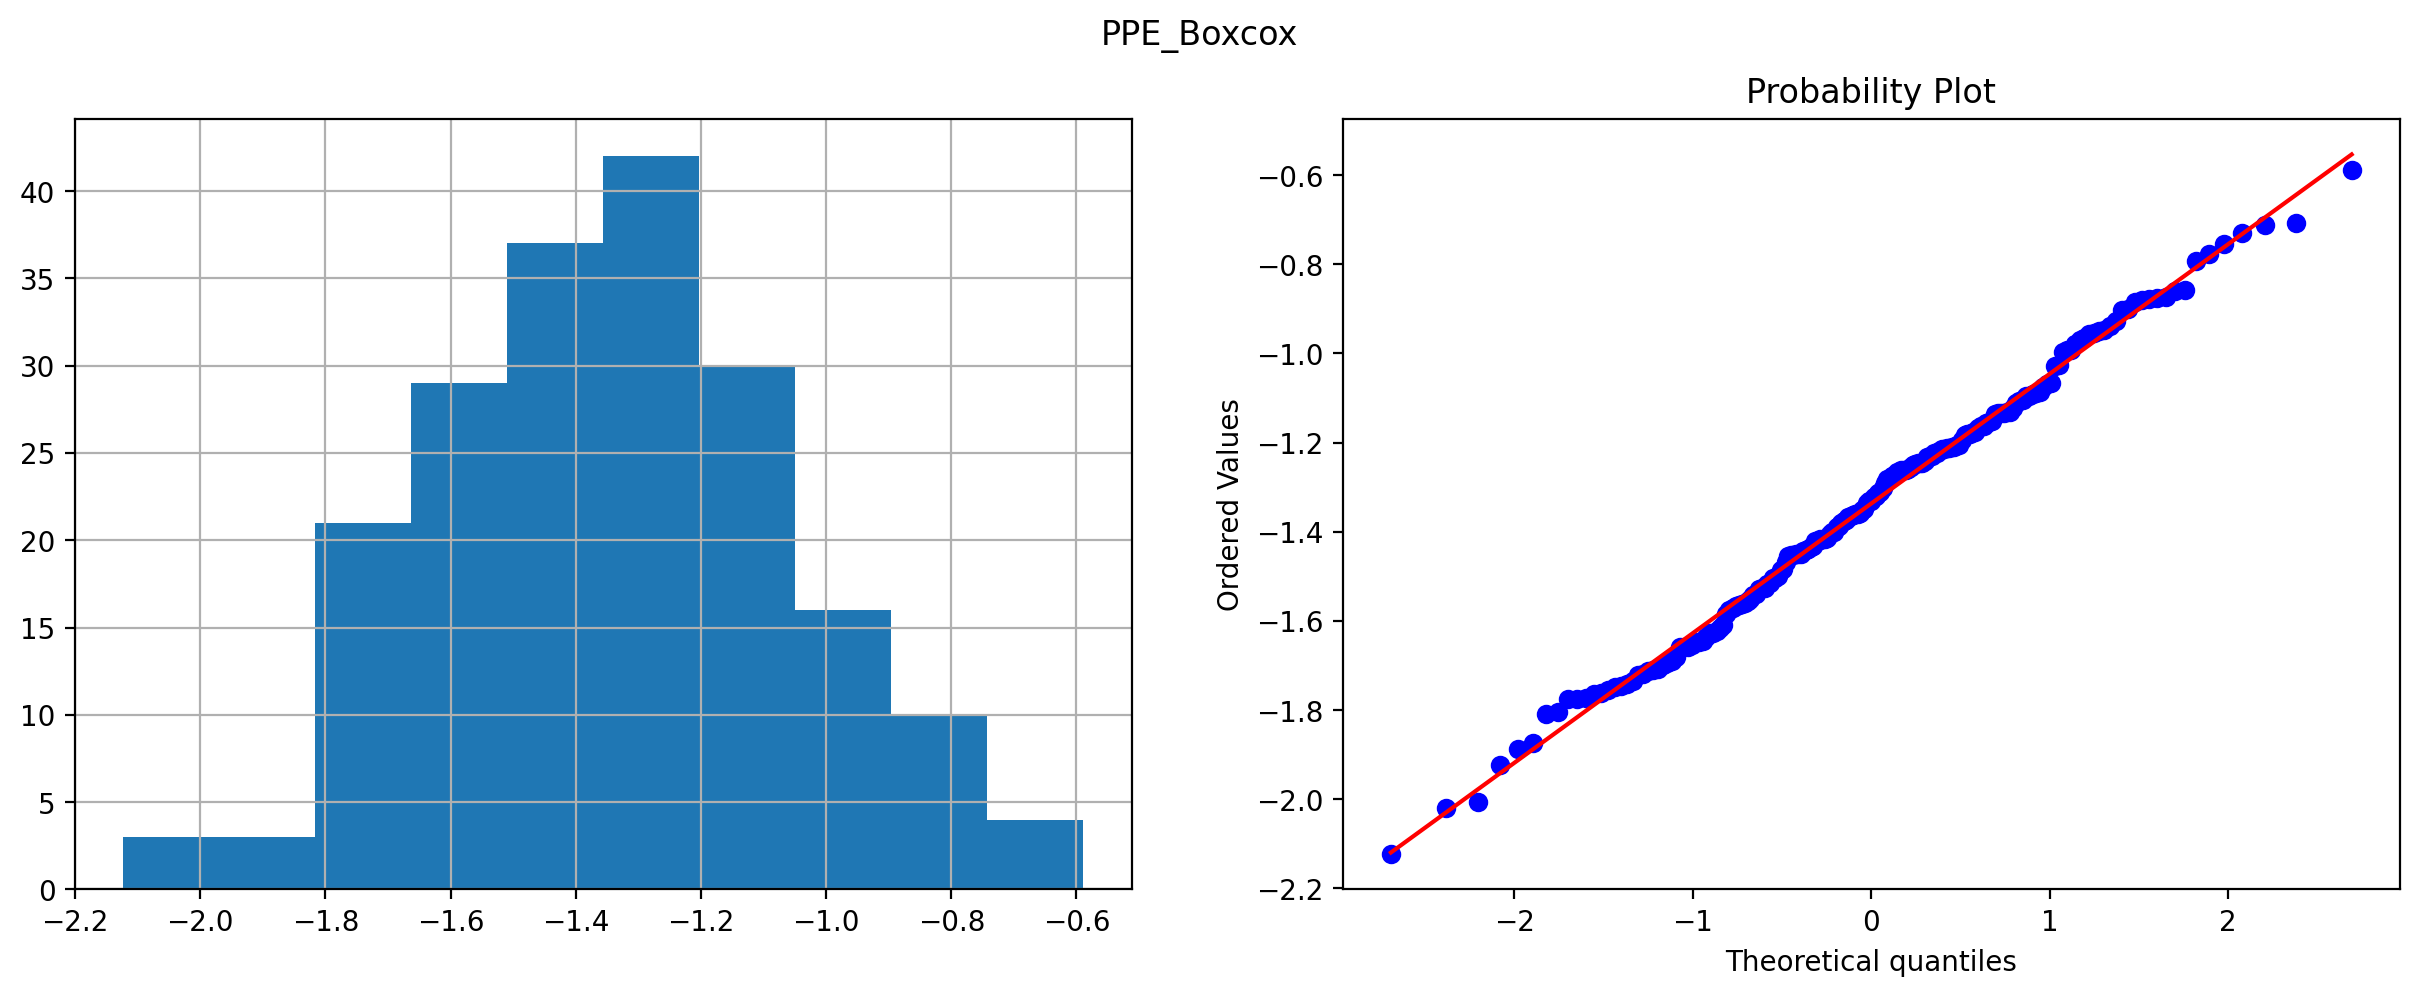

In [42]:
for i in [ 'spread2', 'D2', 'PPE']:
    data[i+'_Boxcox'],parameters=stat.boxcox(data[i])
    plt_qq(data,i+'_Boxcox')

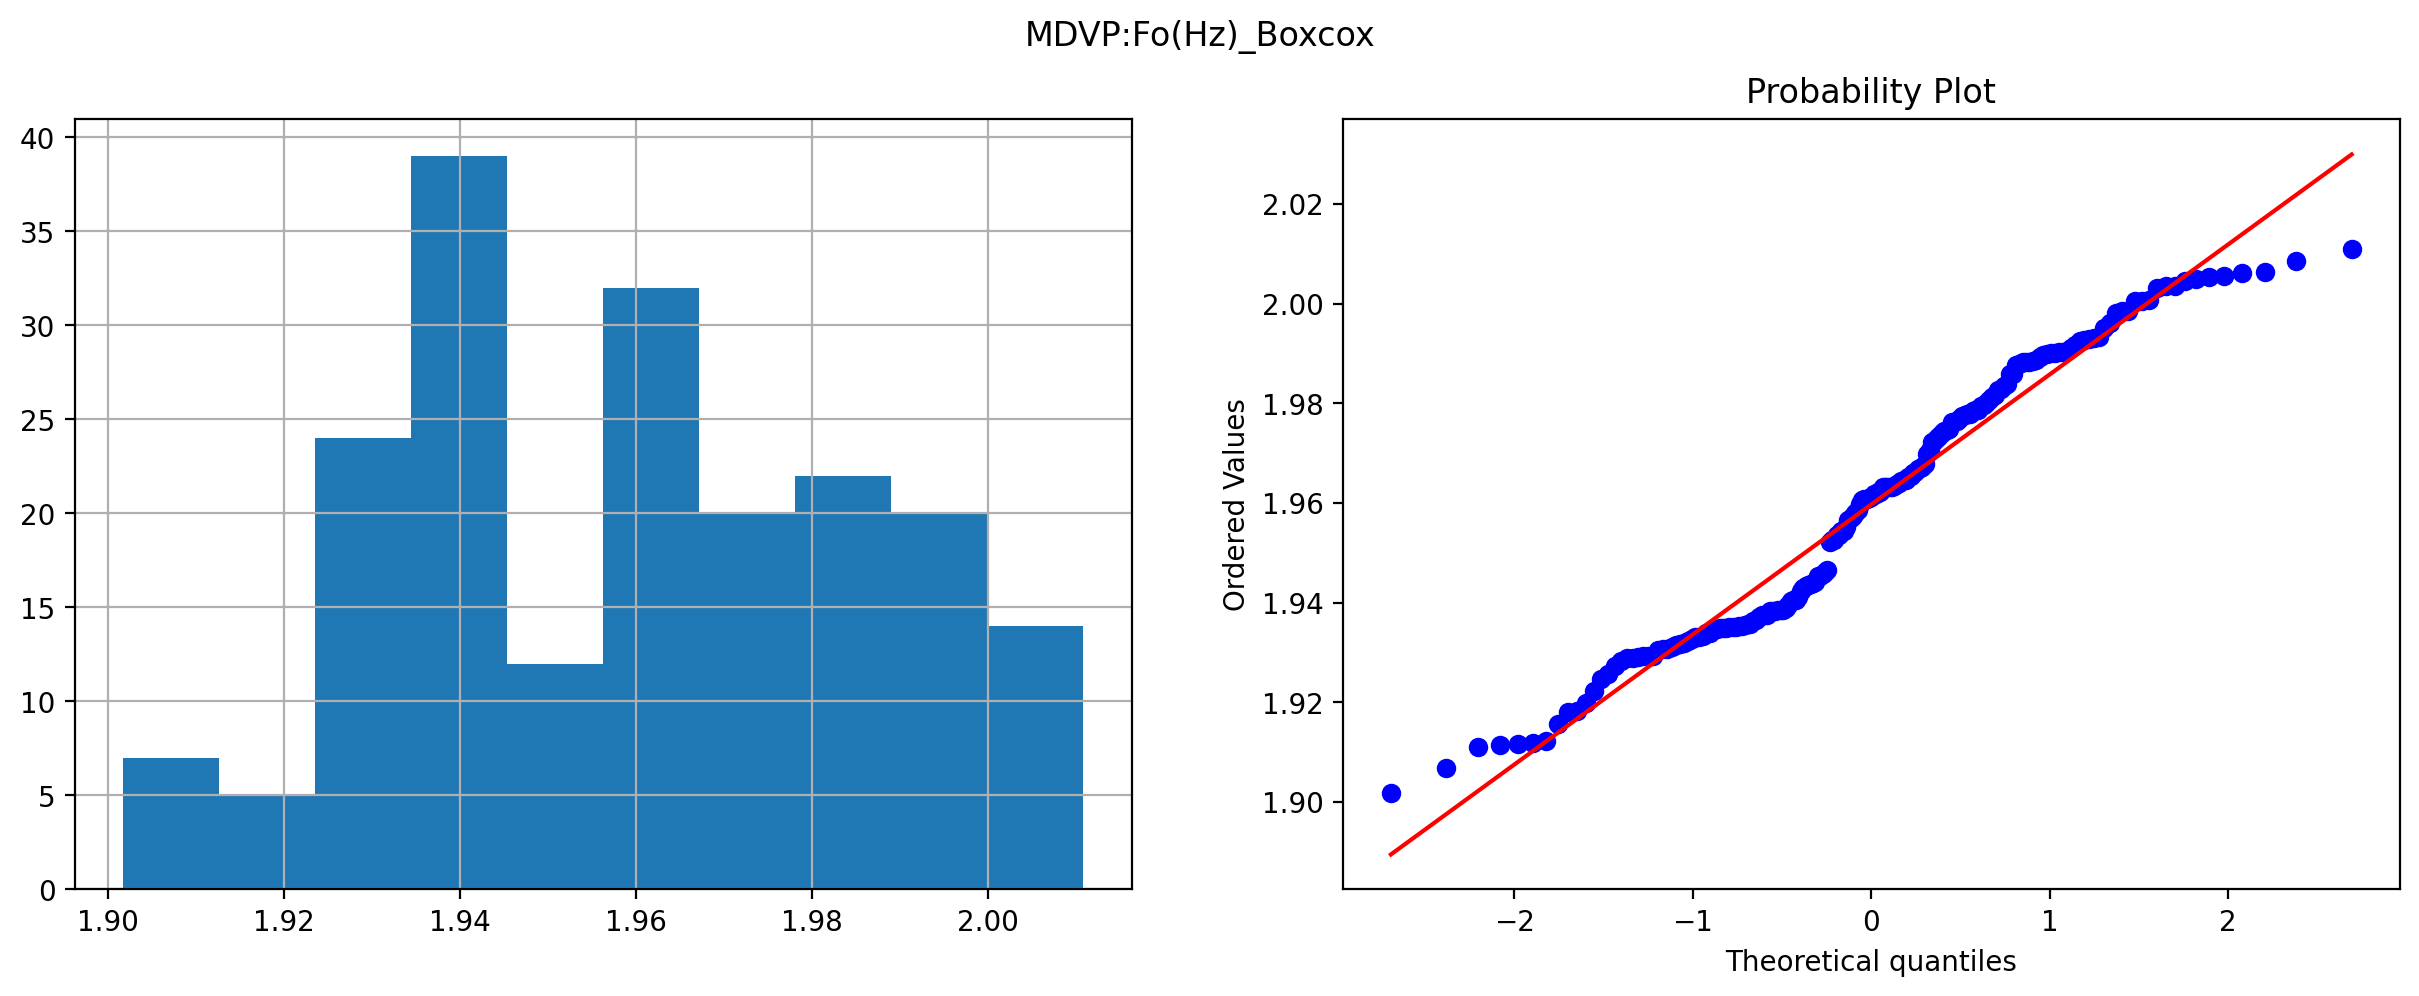

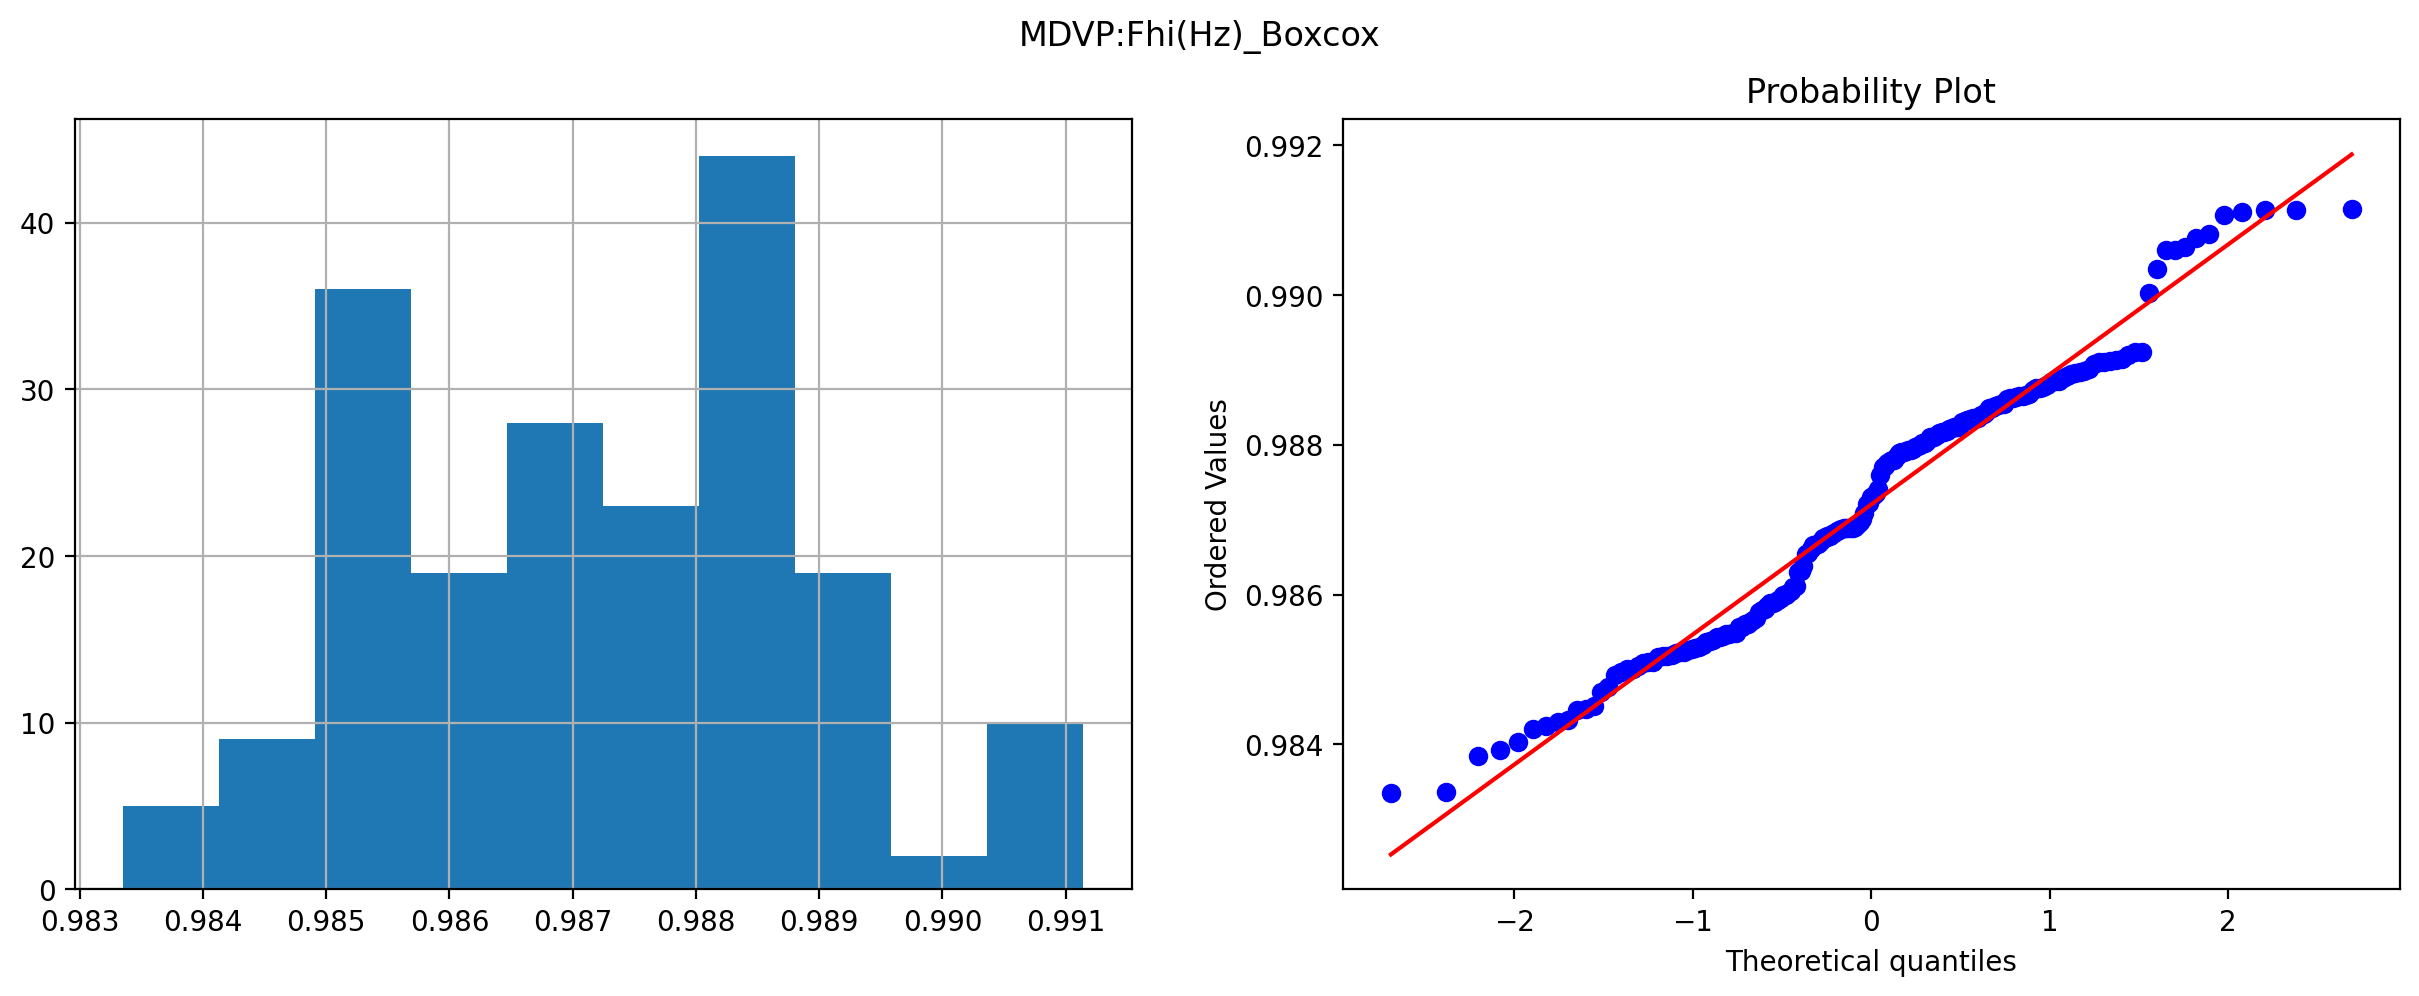

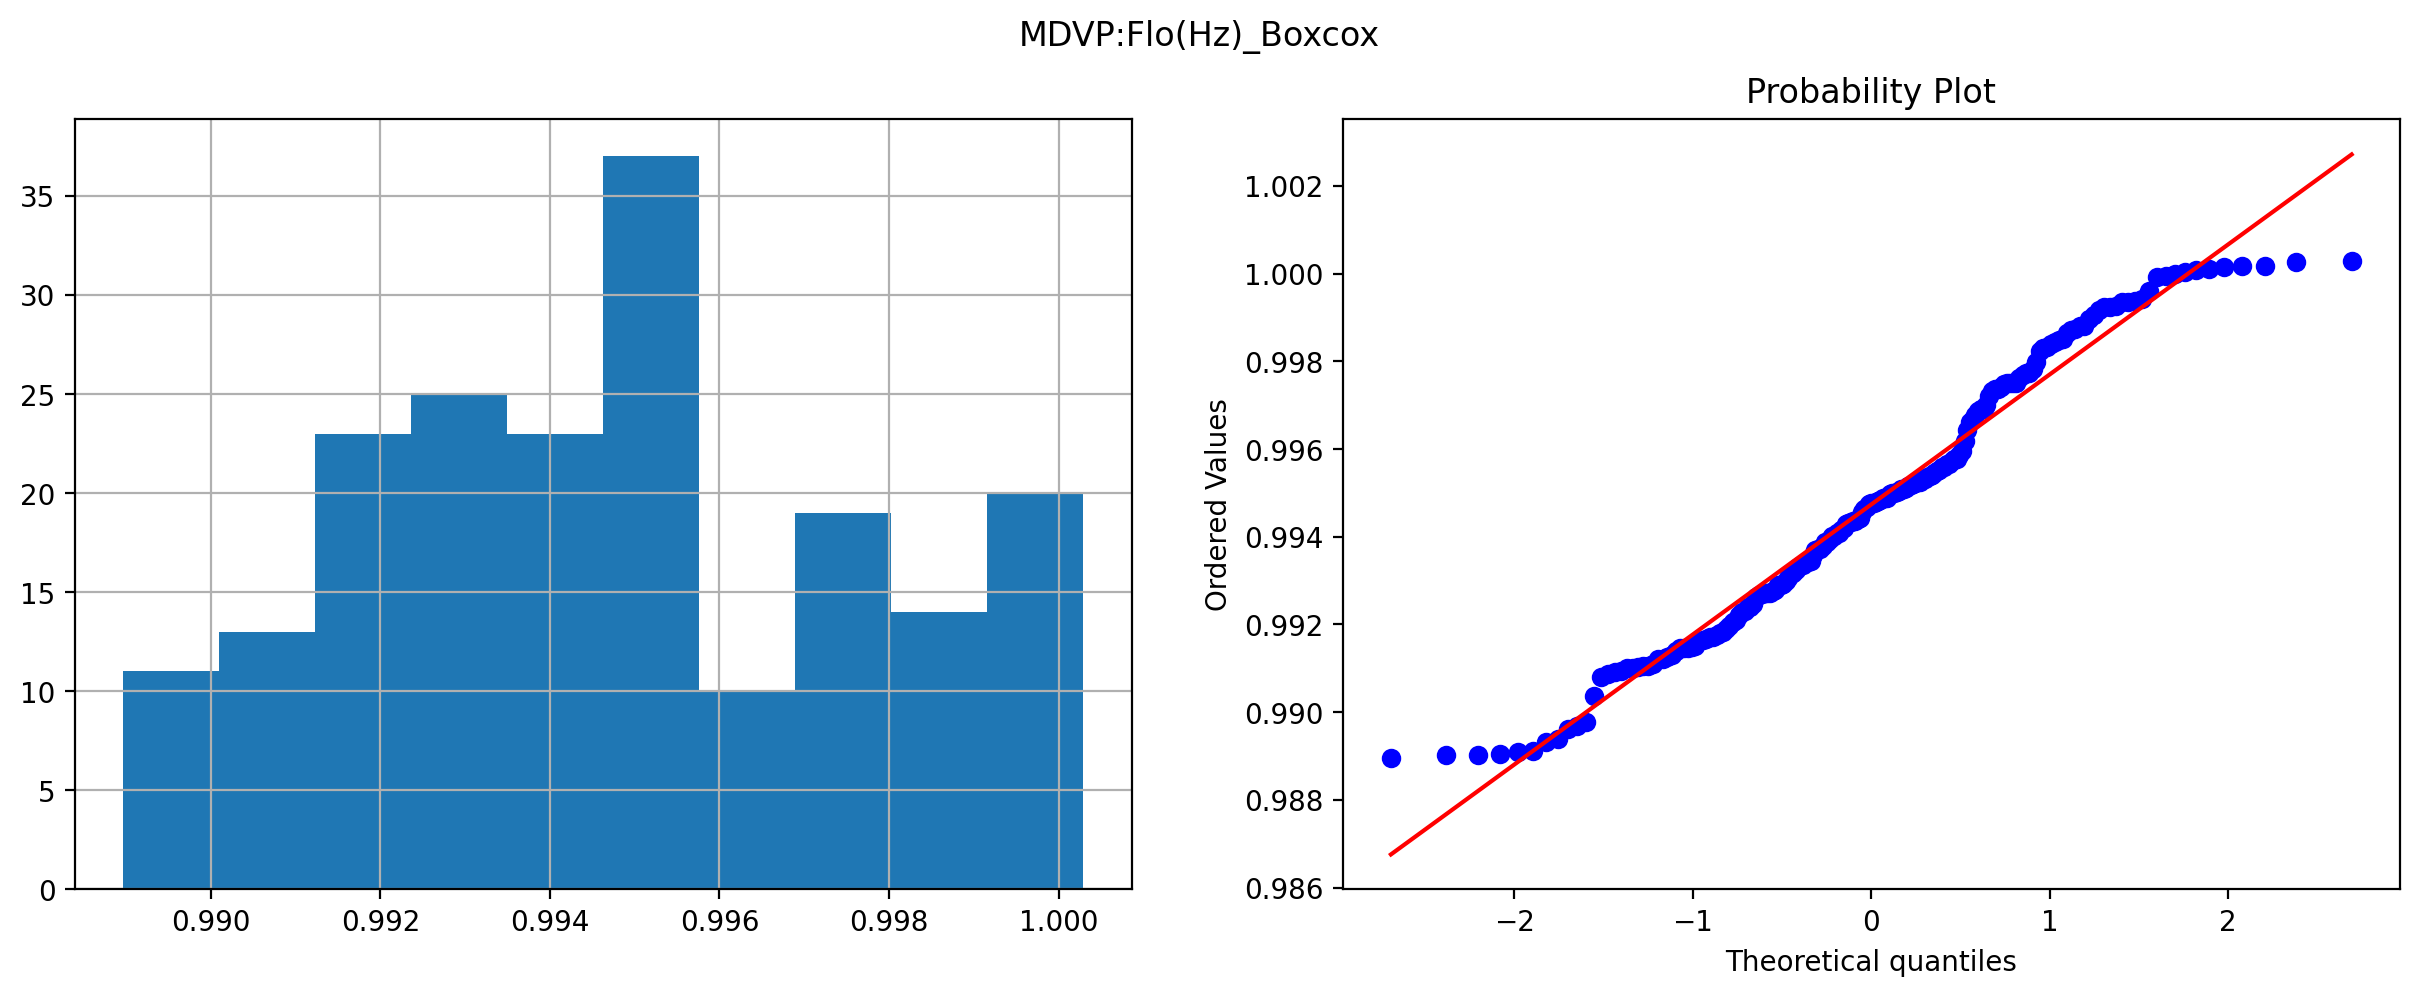

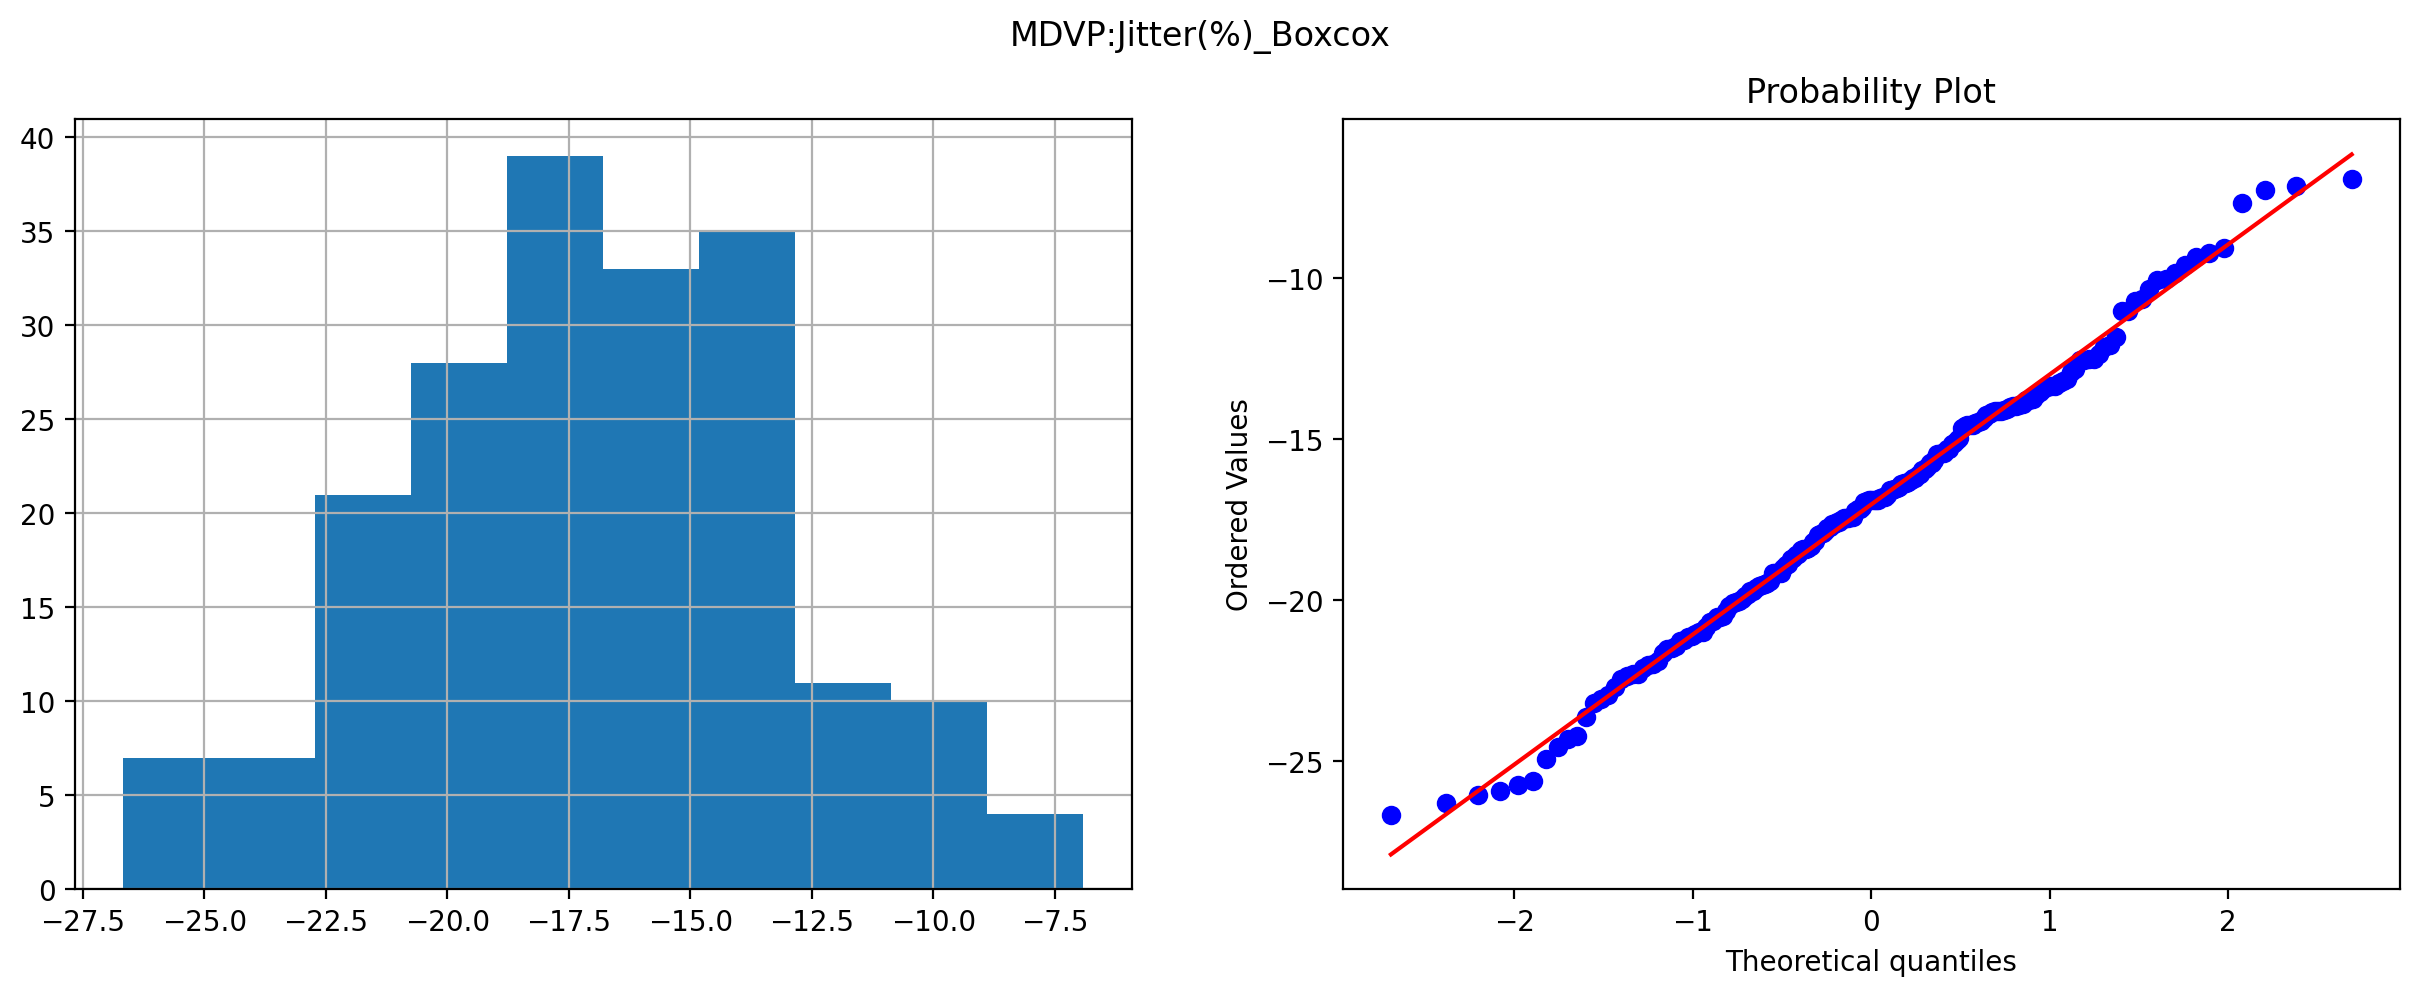

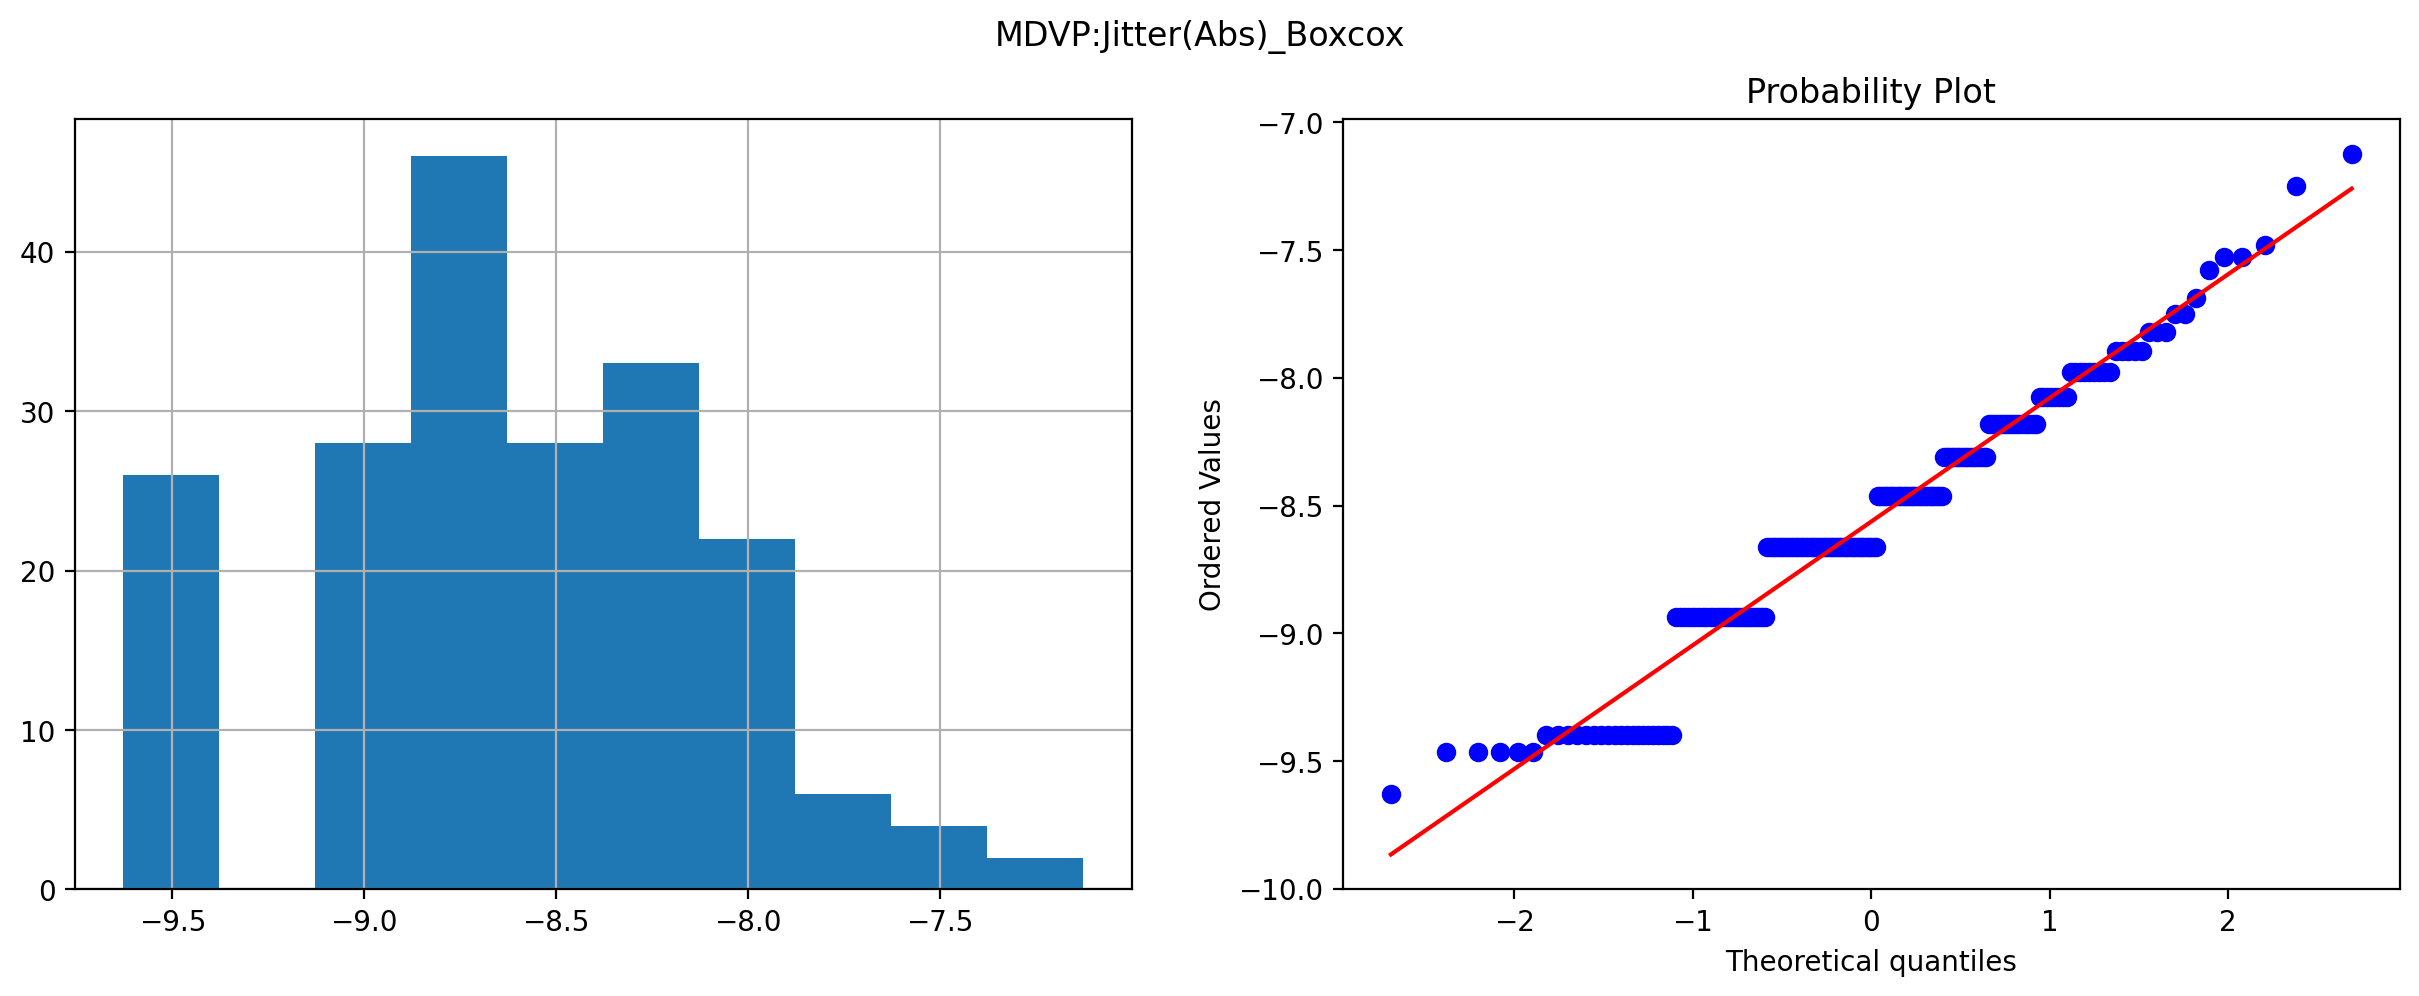

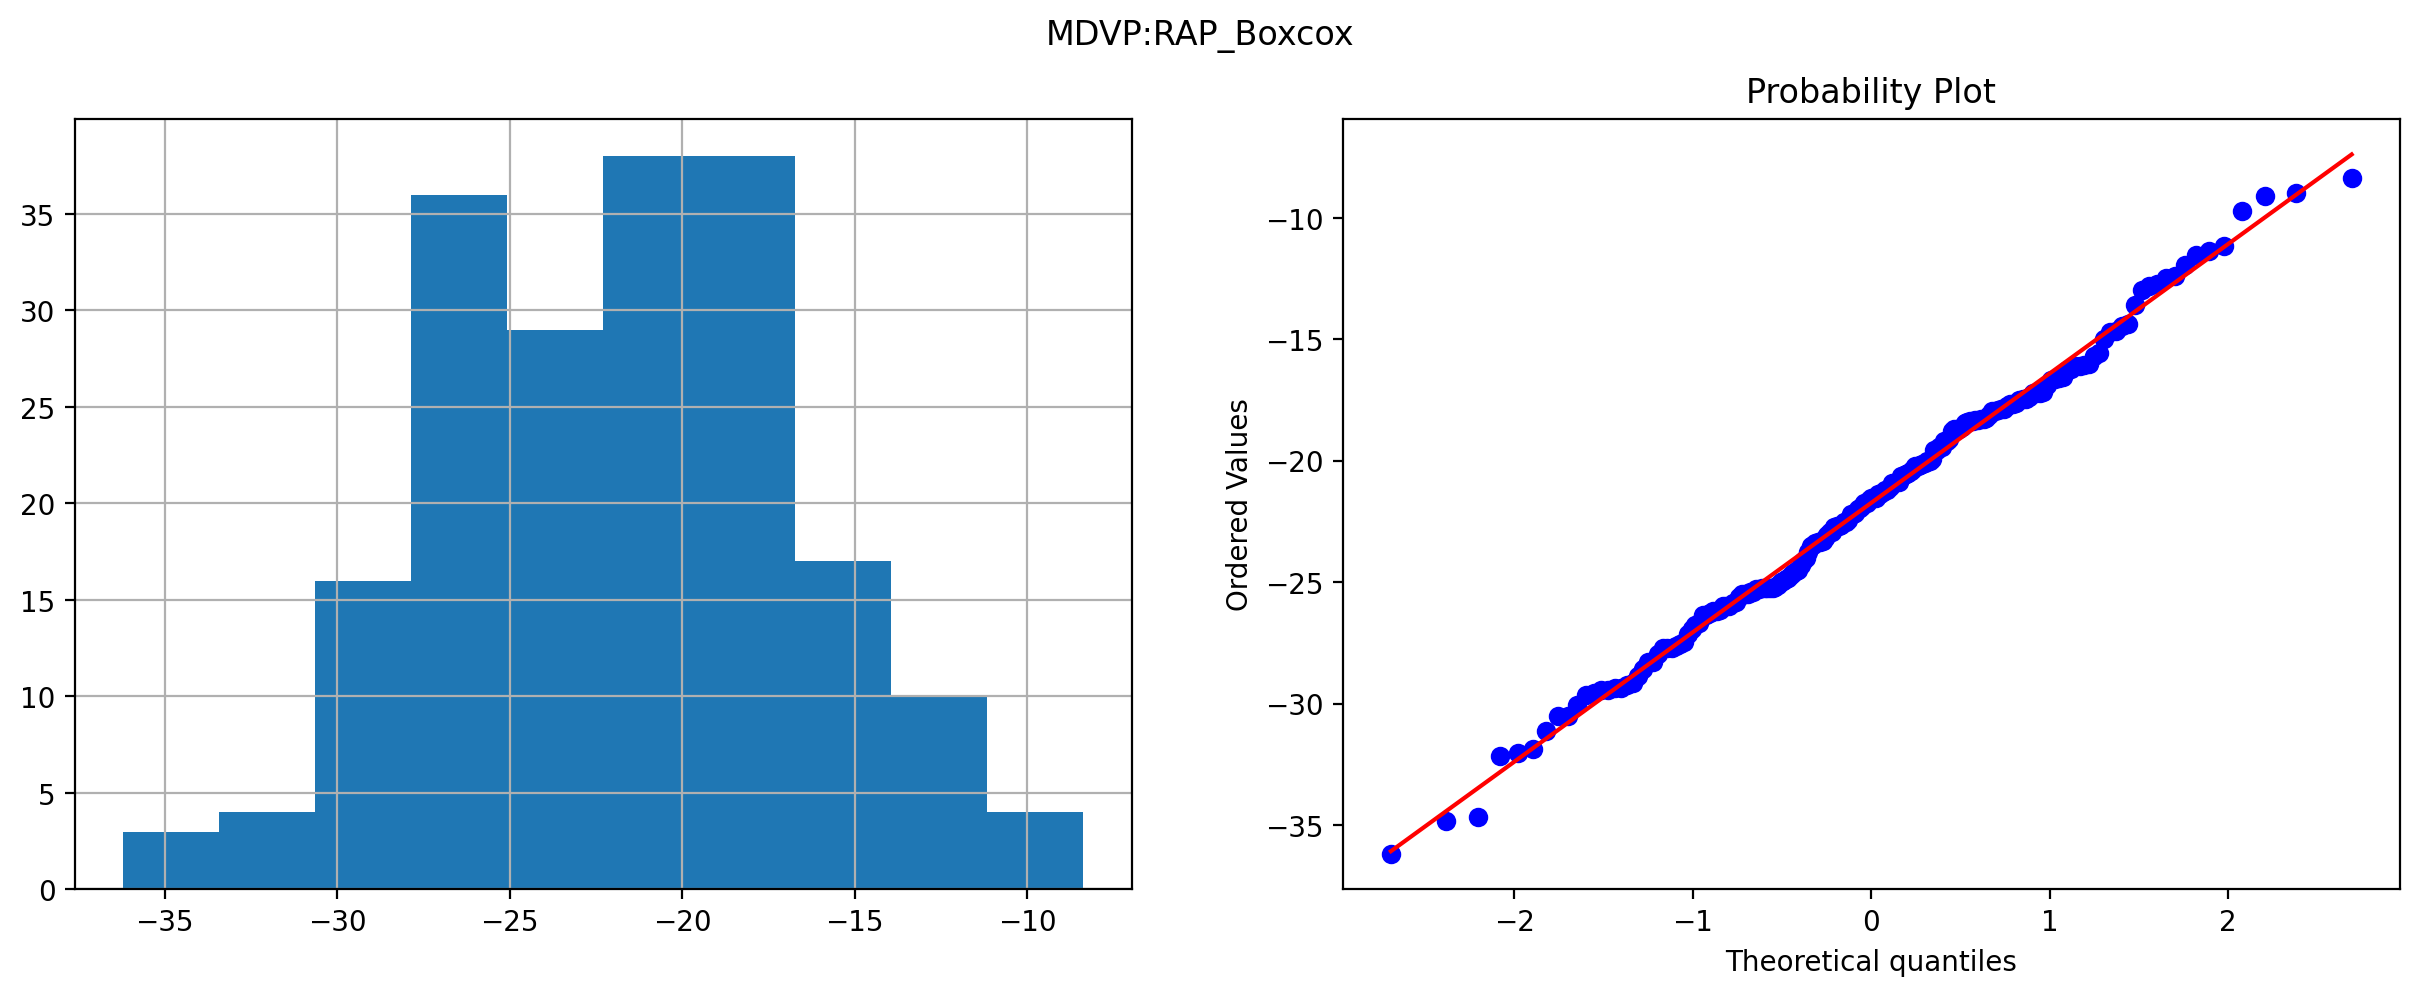

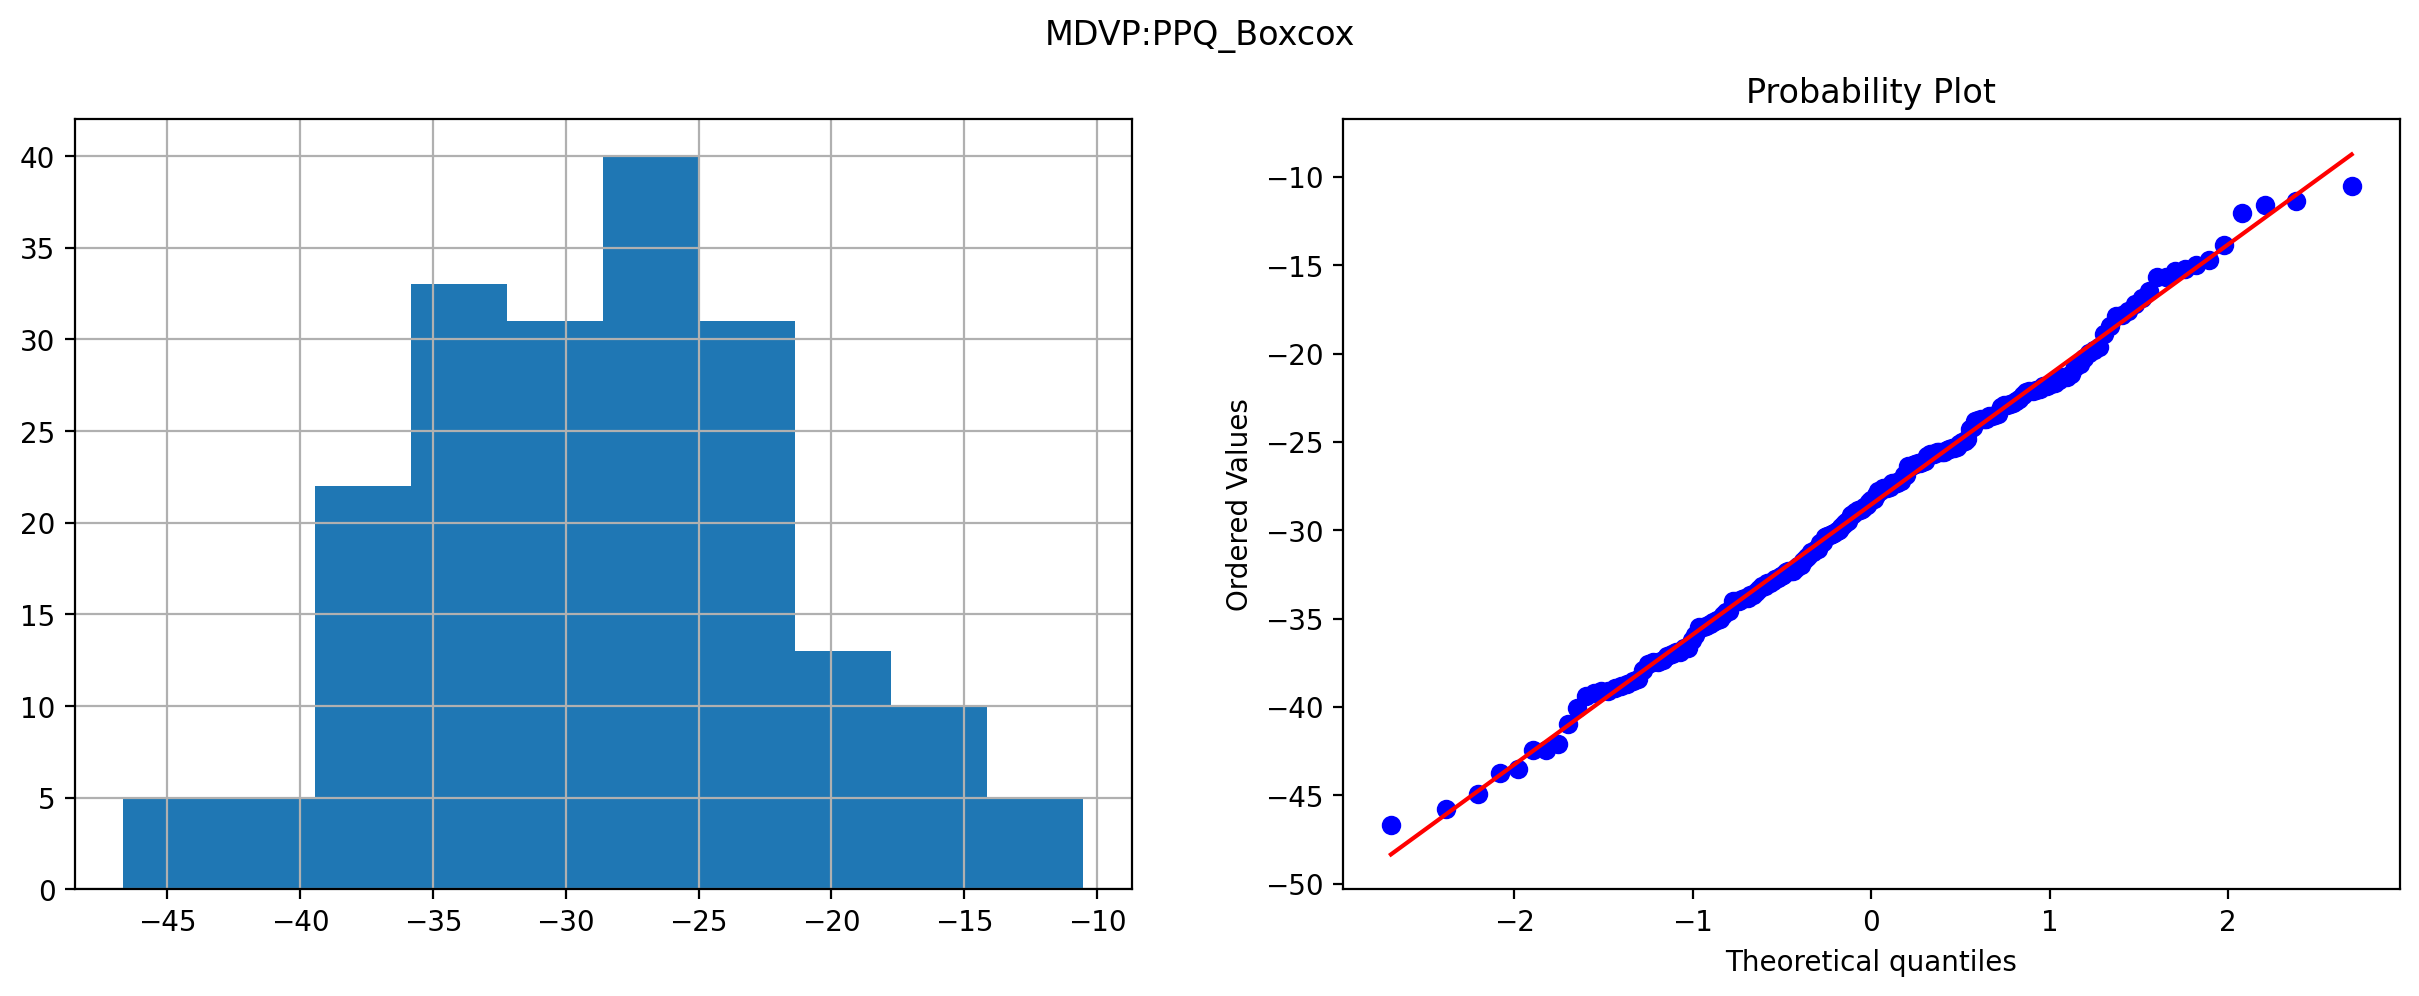

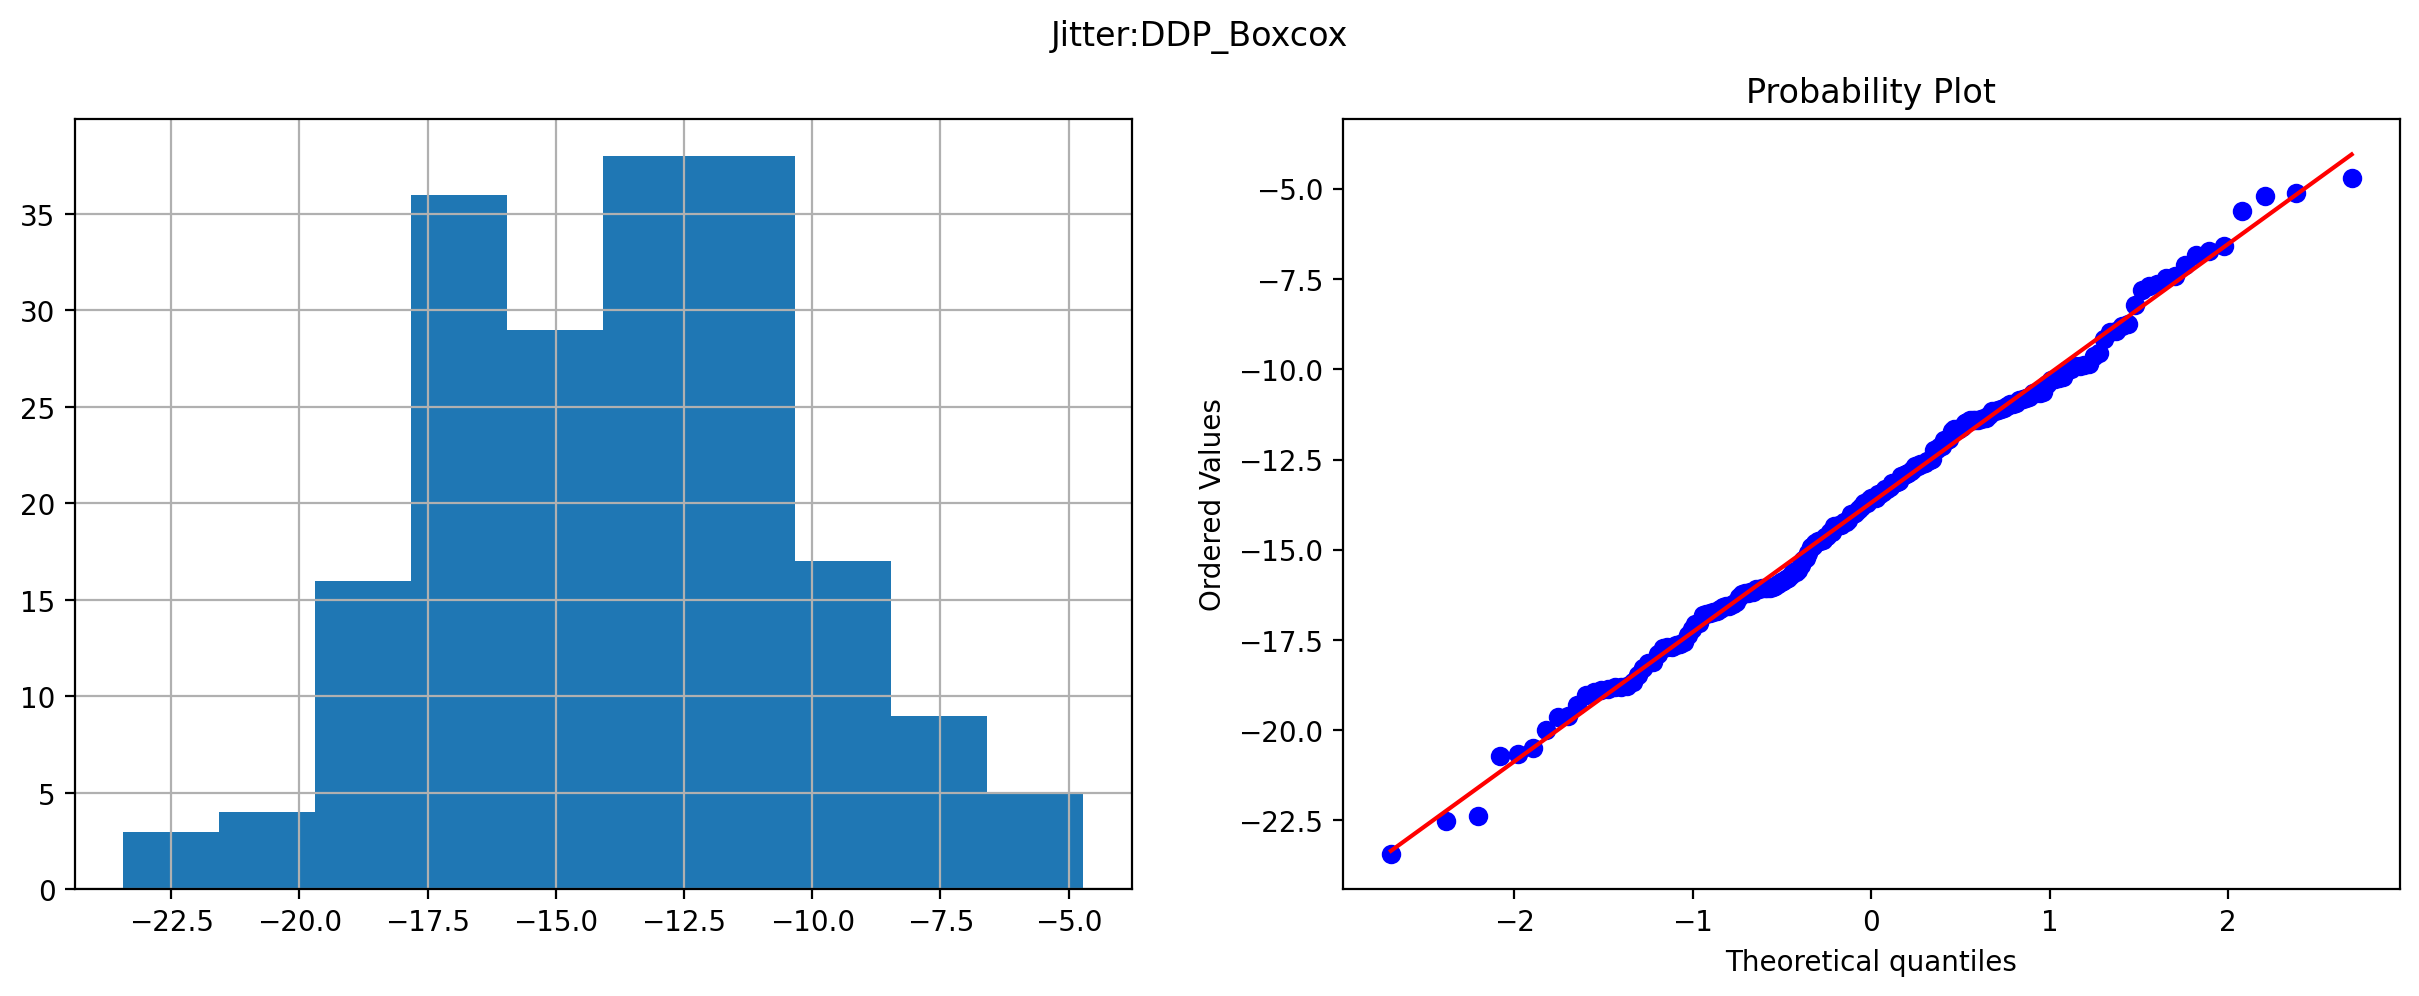

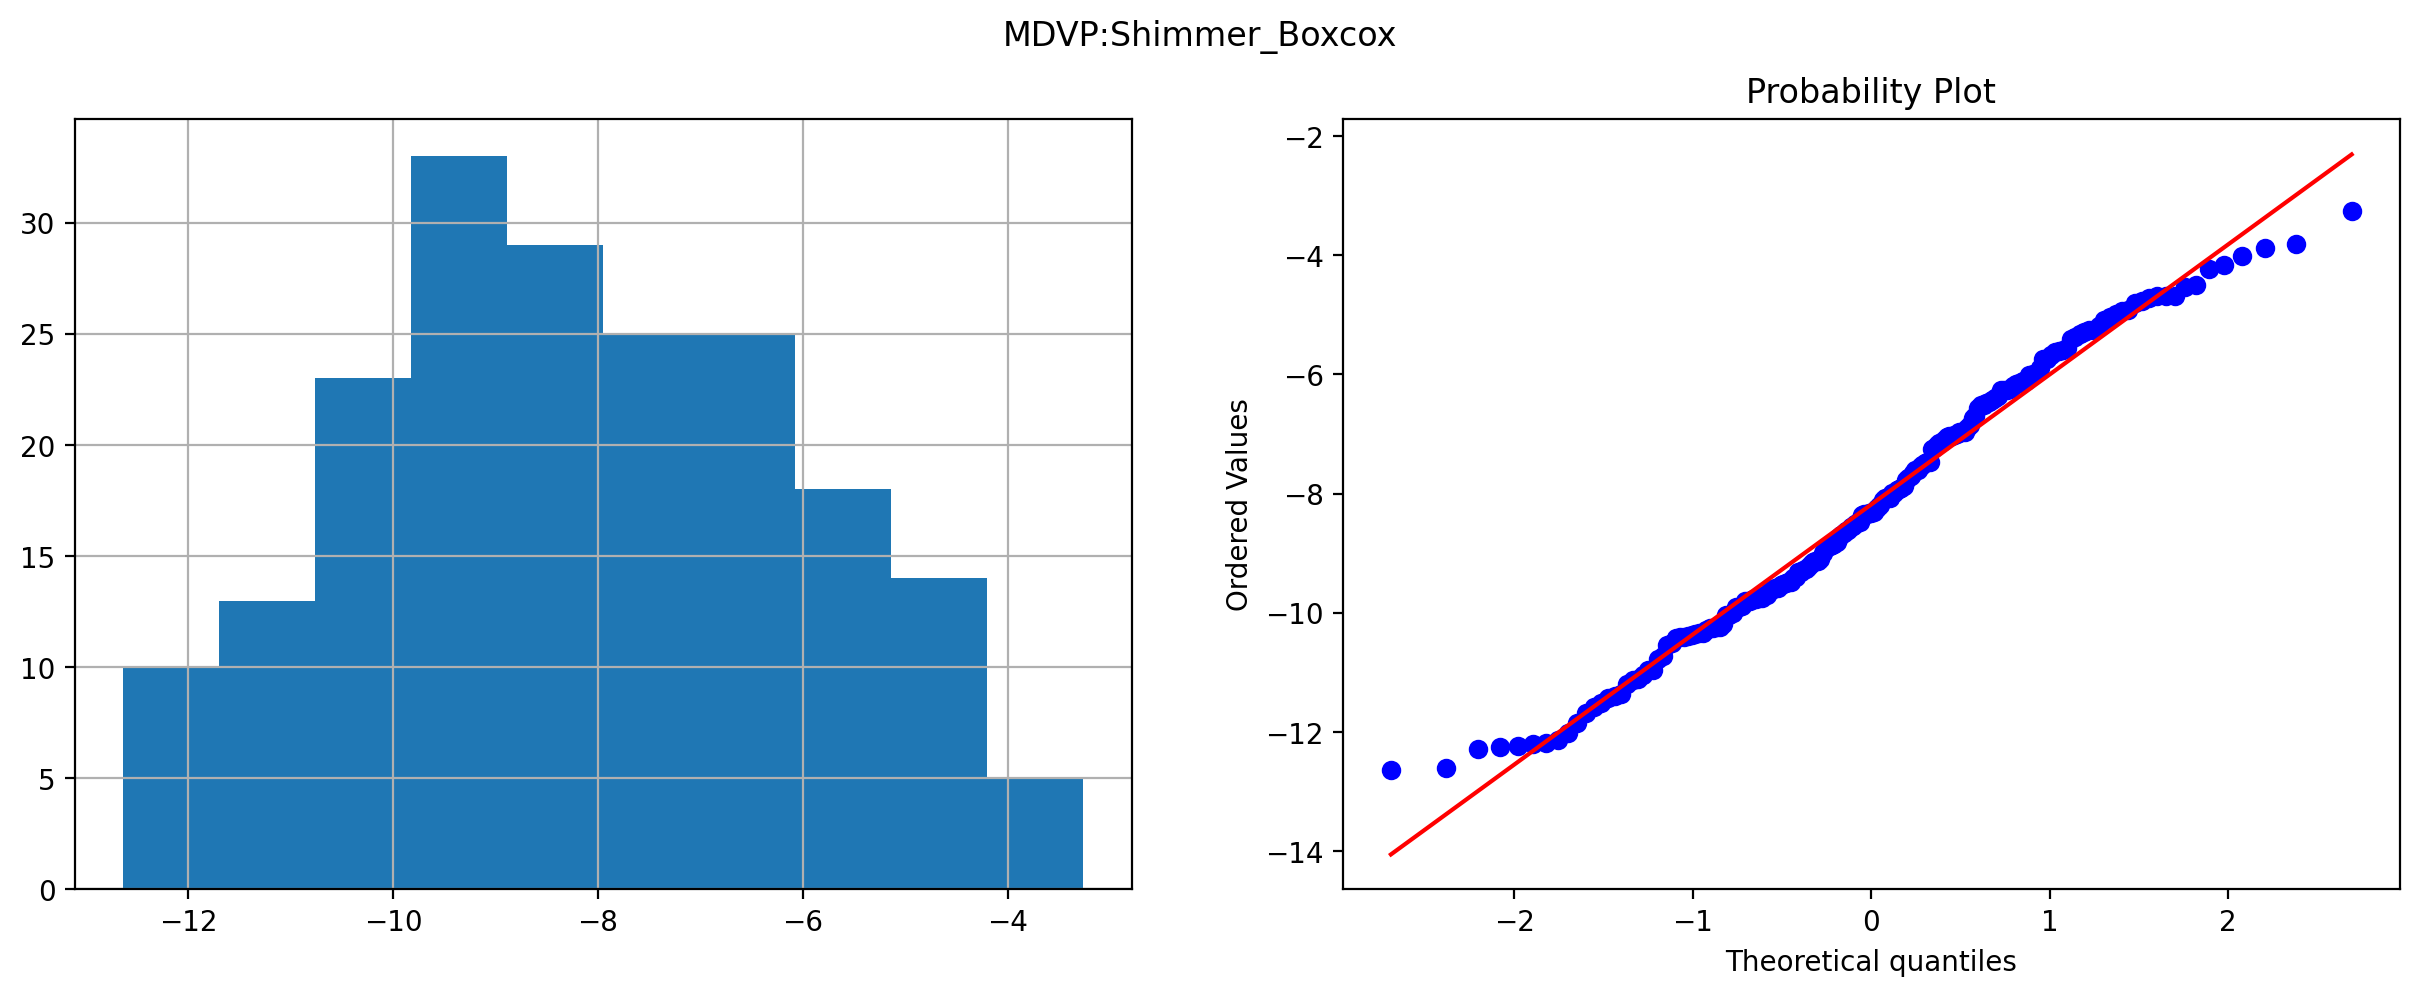

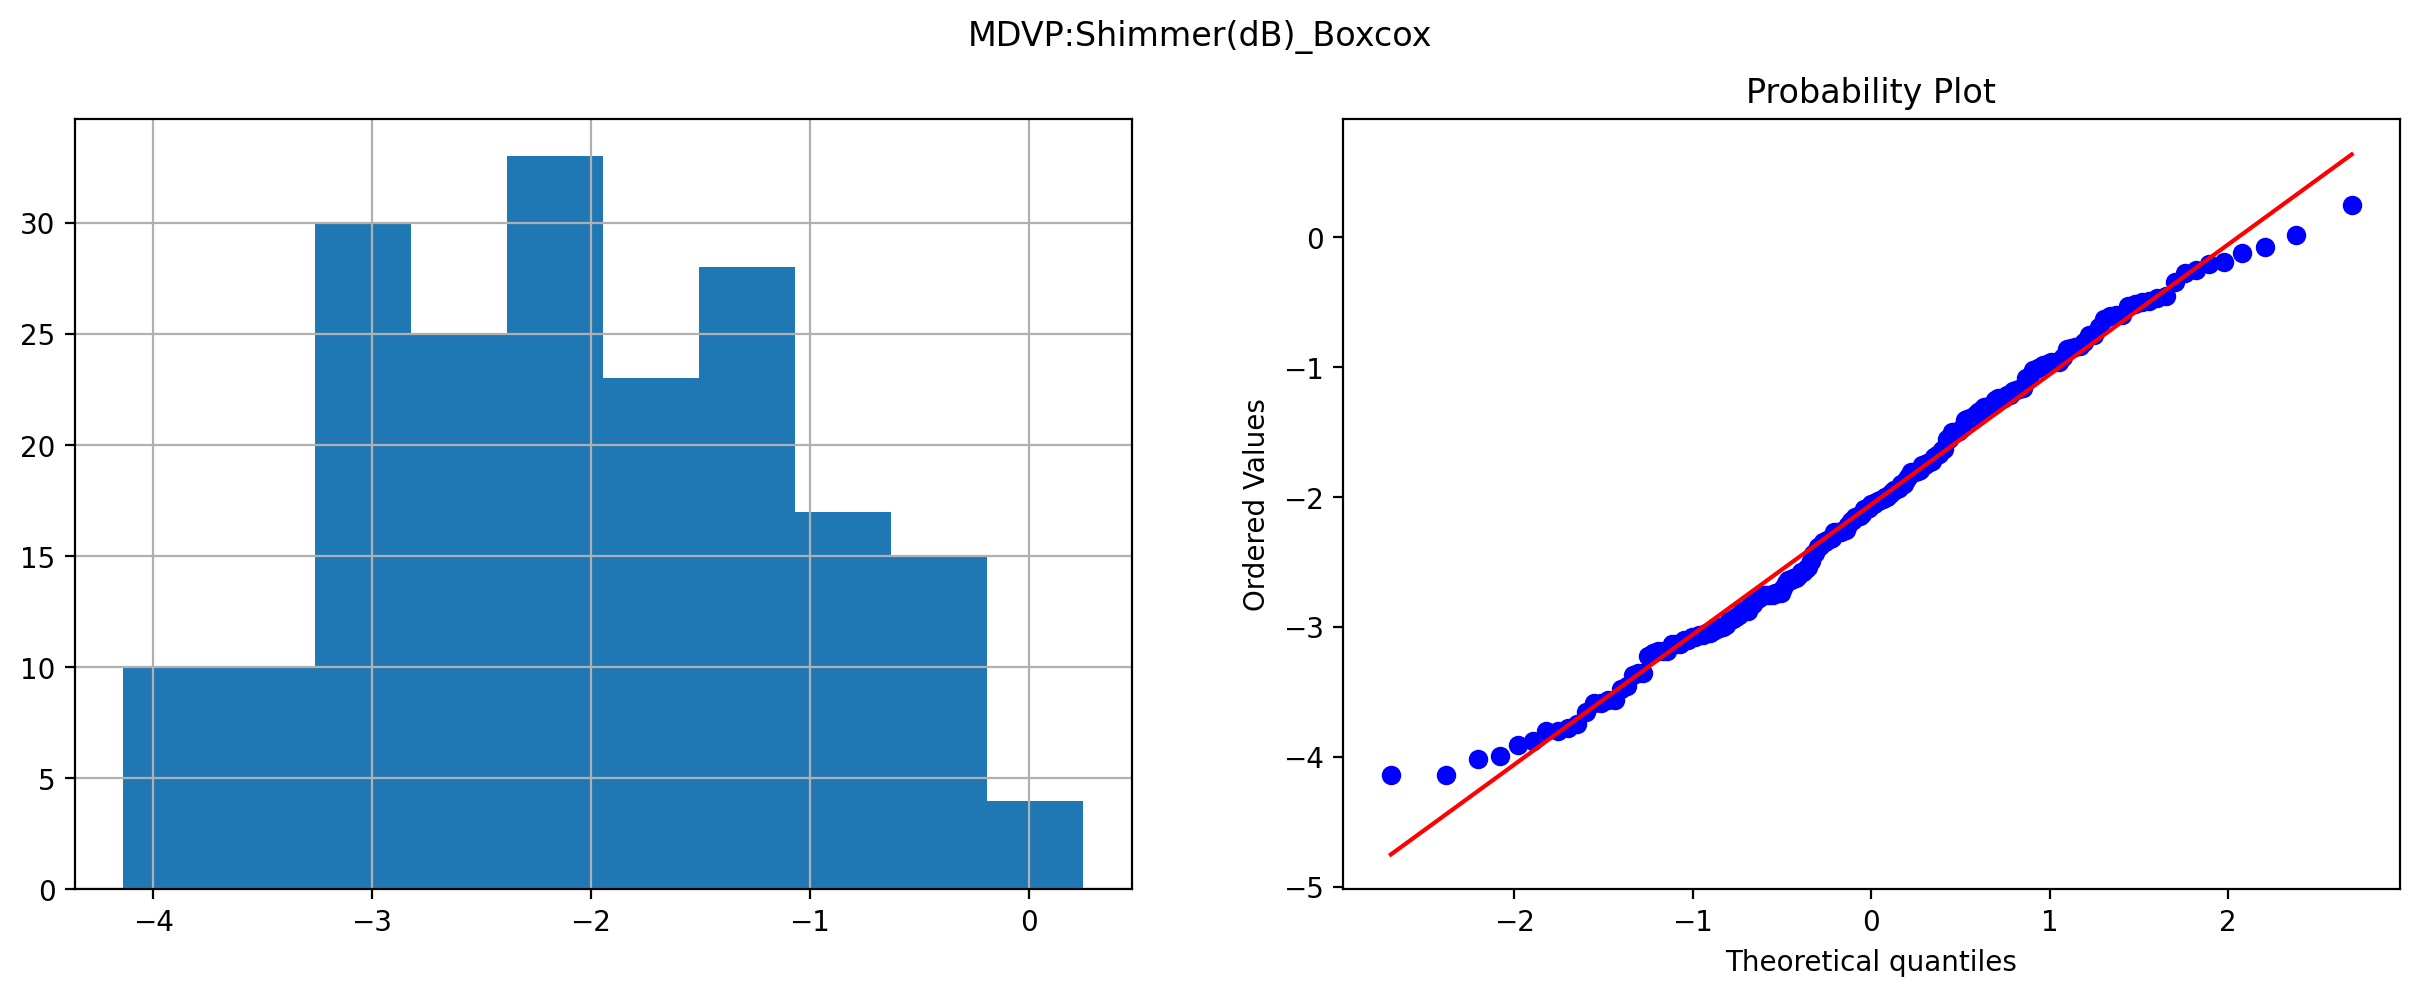

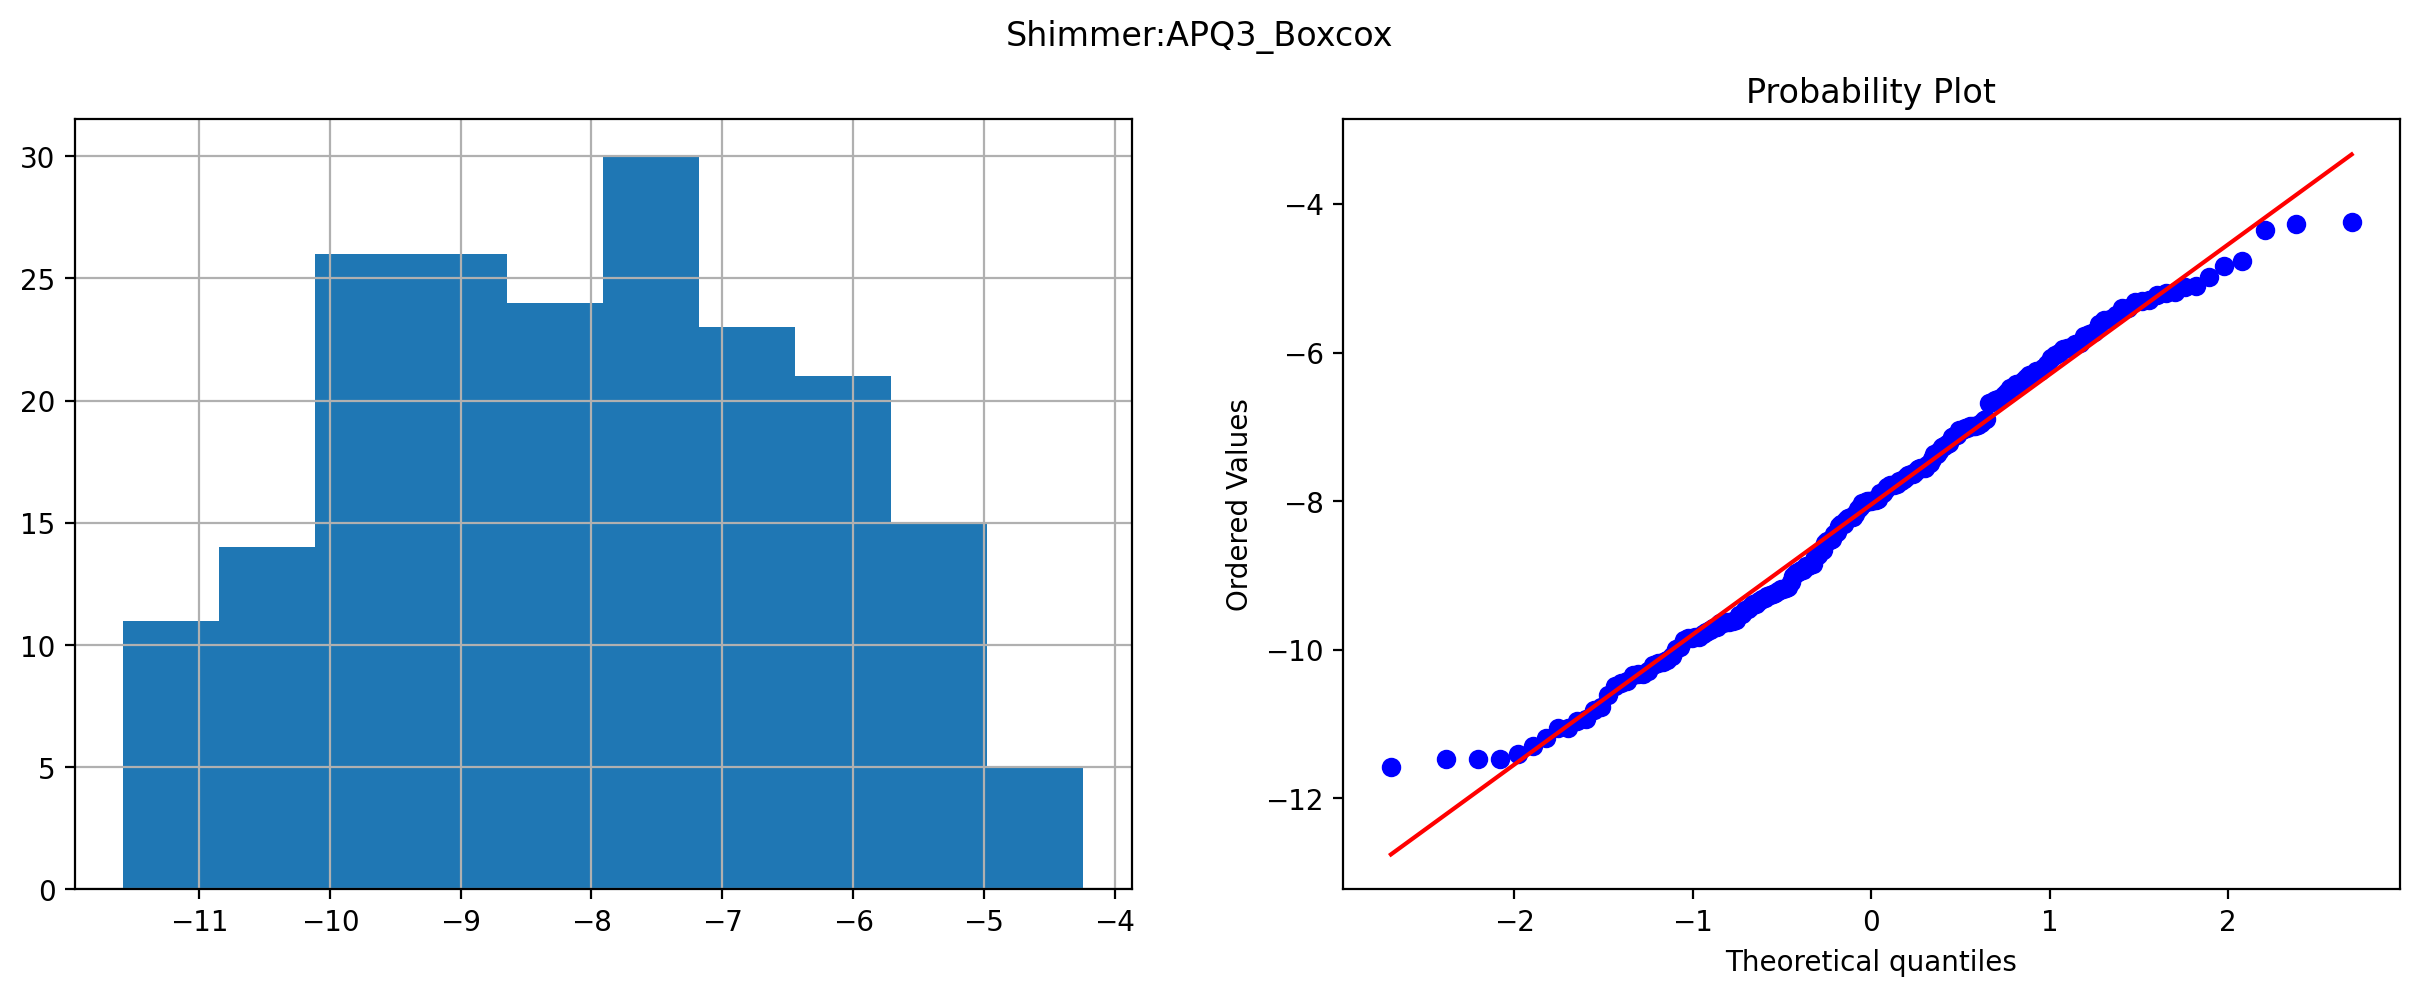

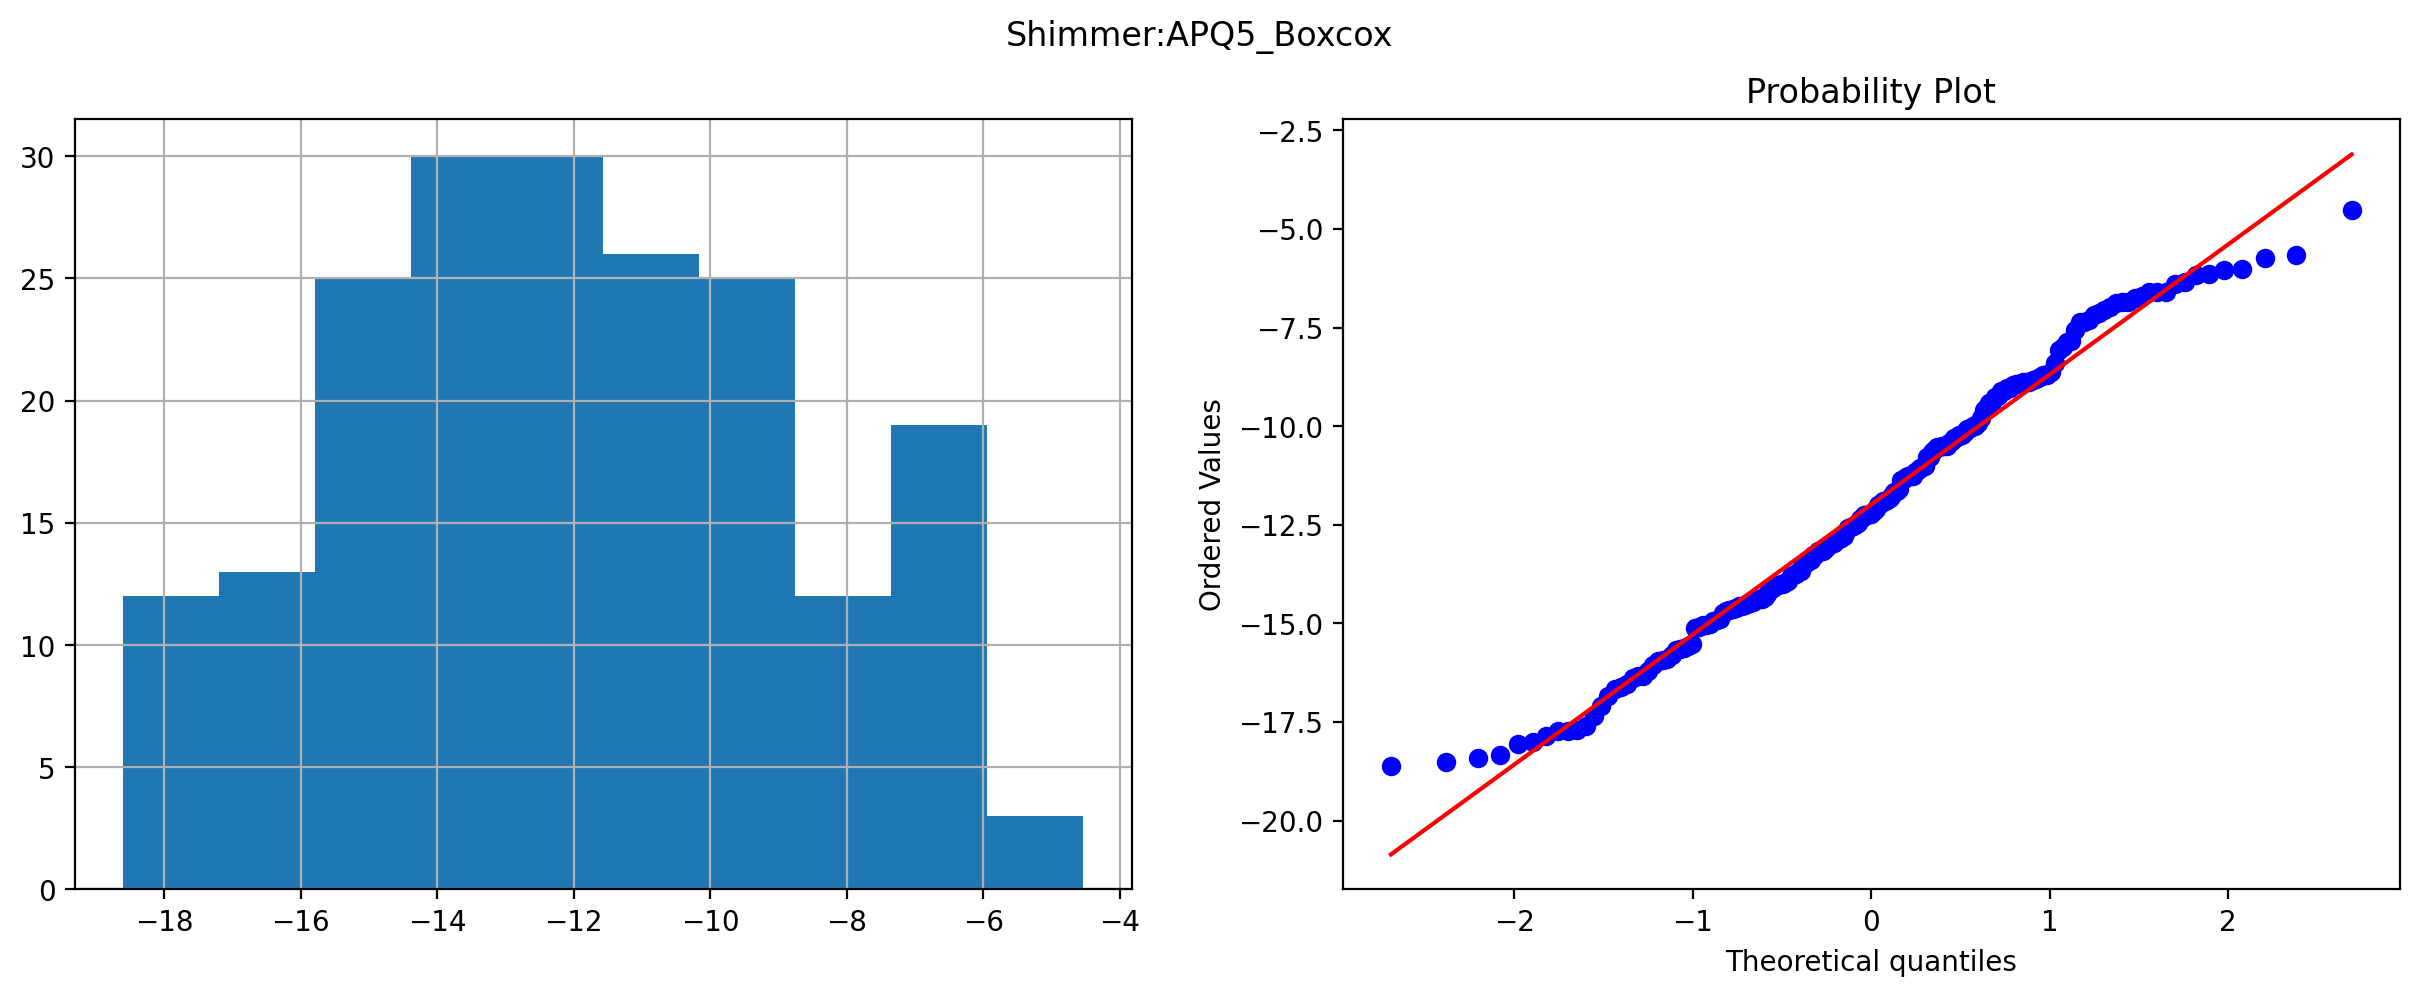

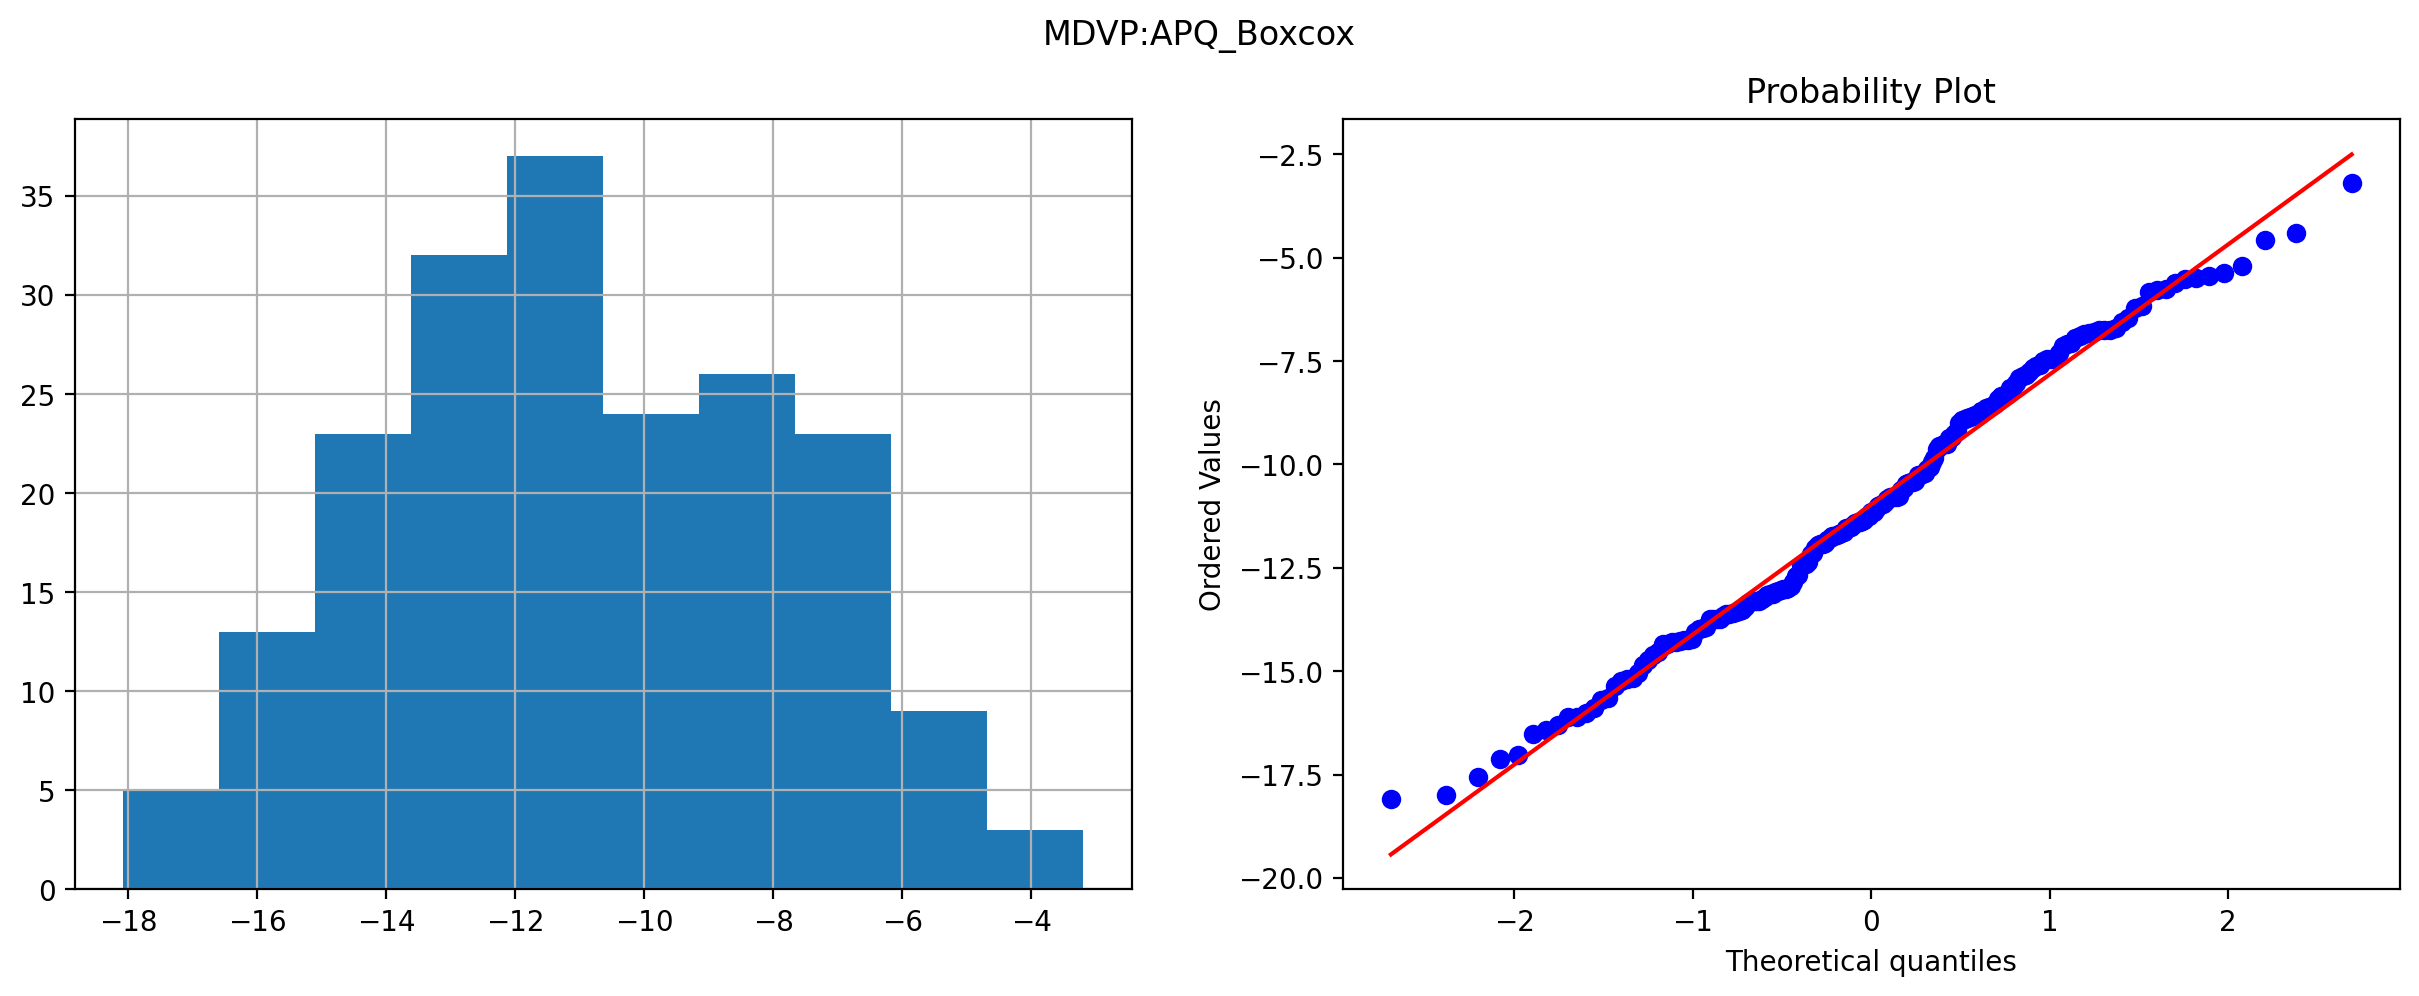

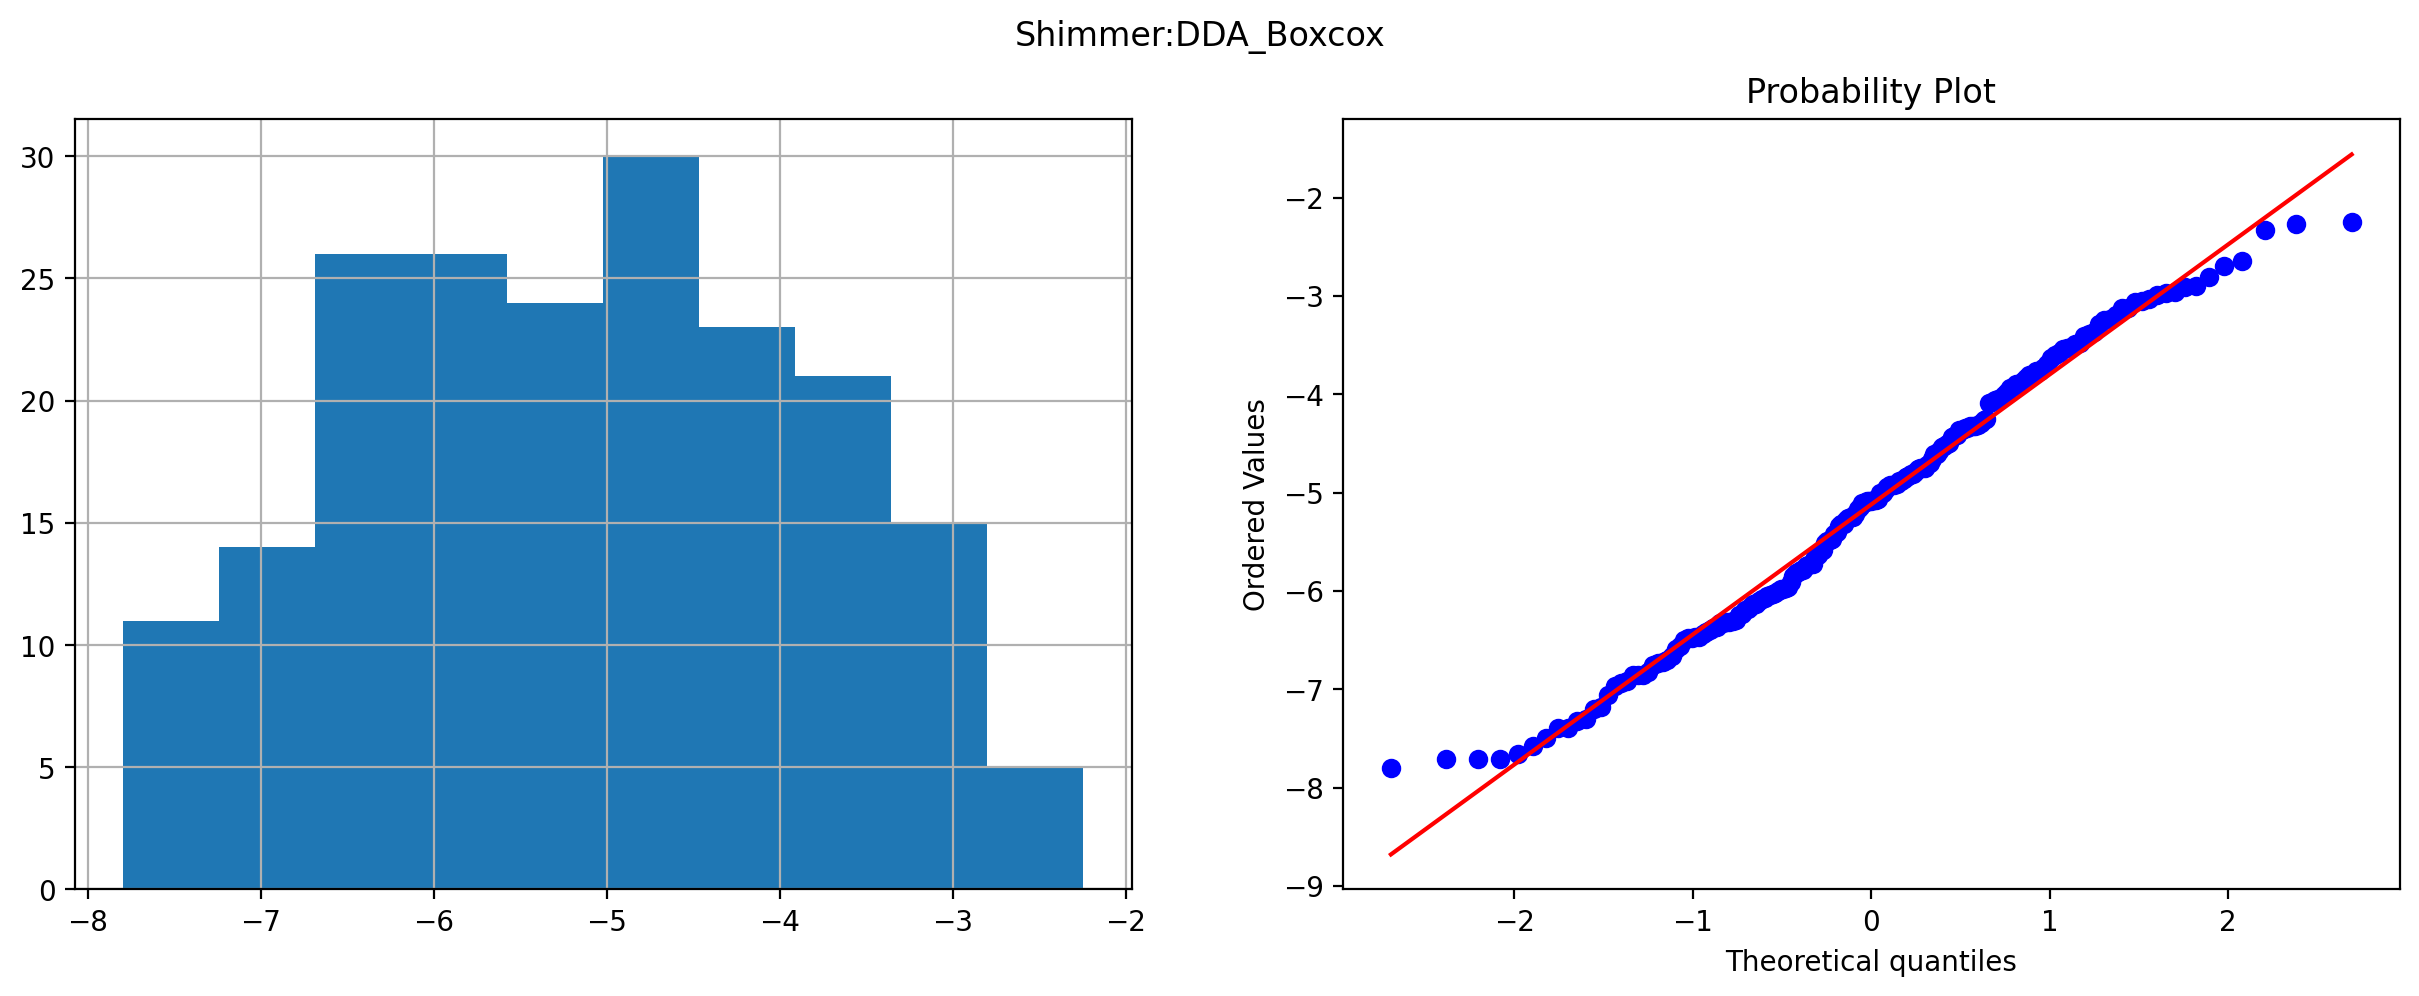

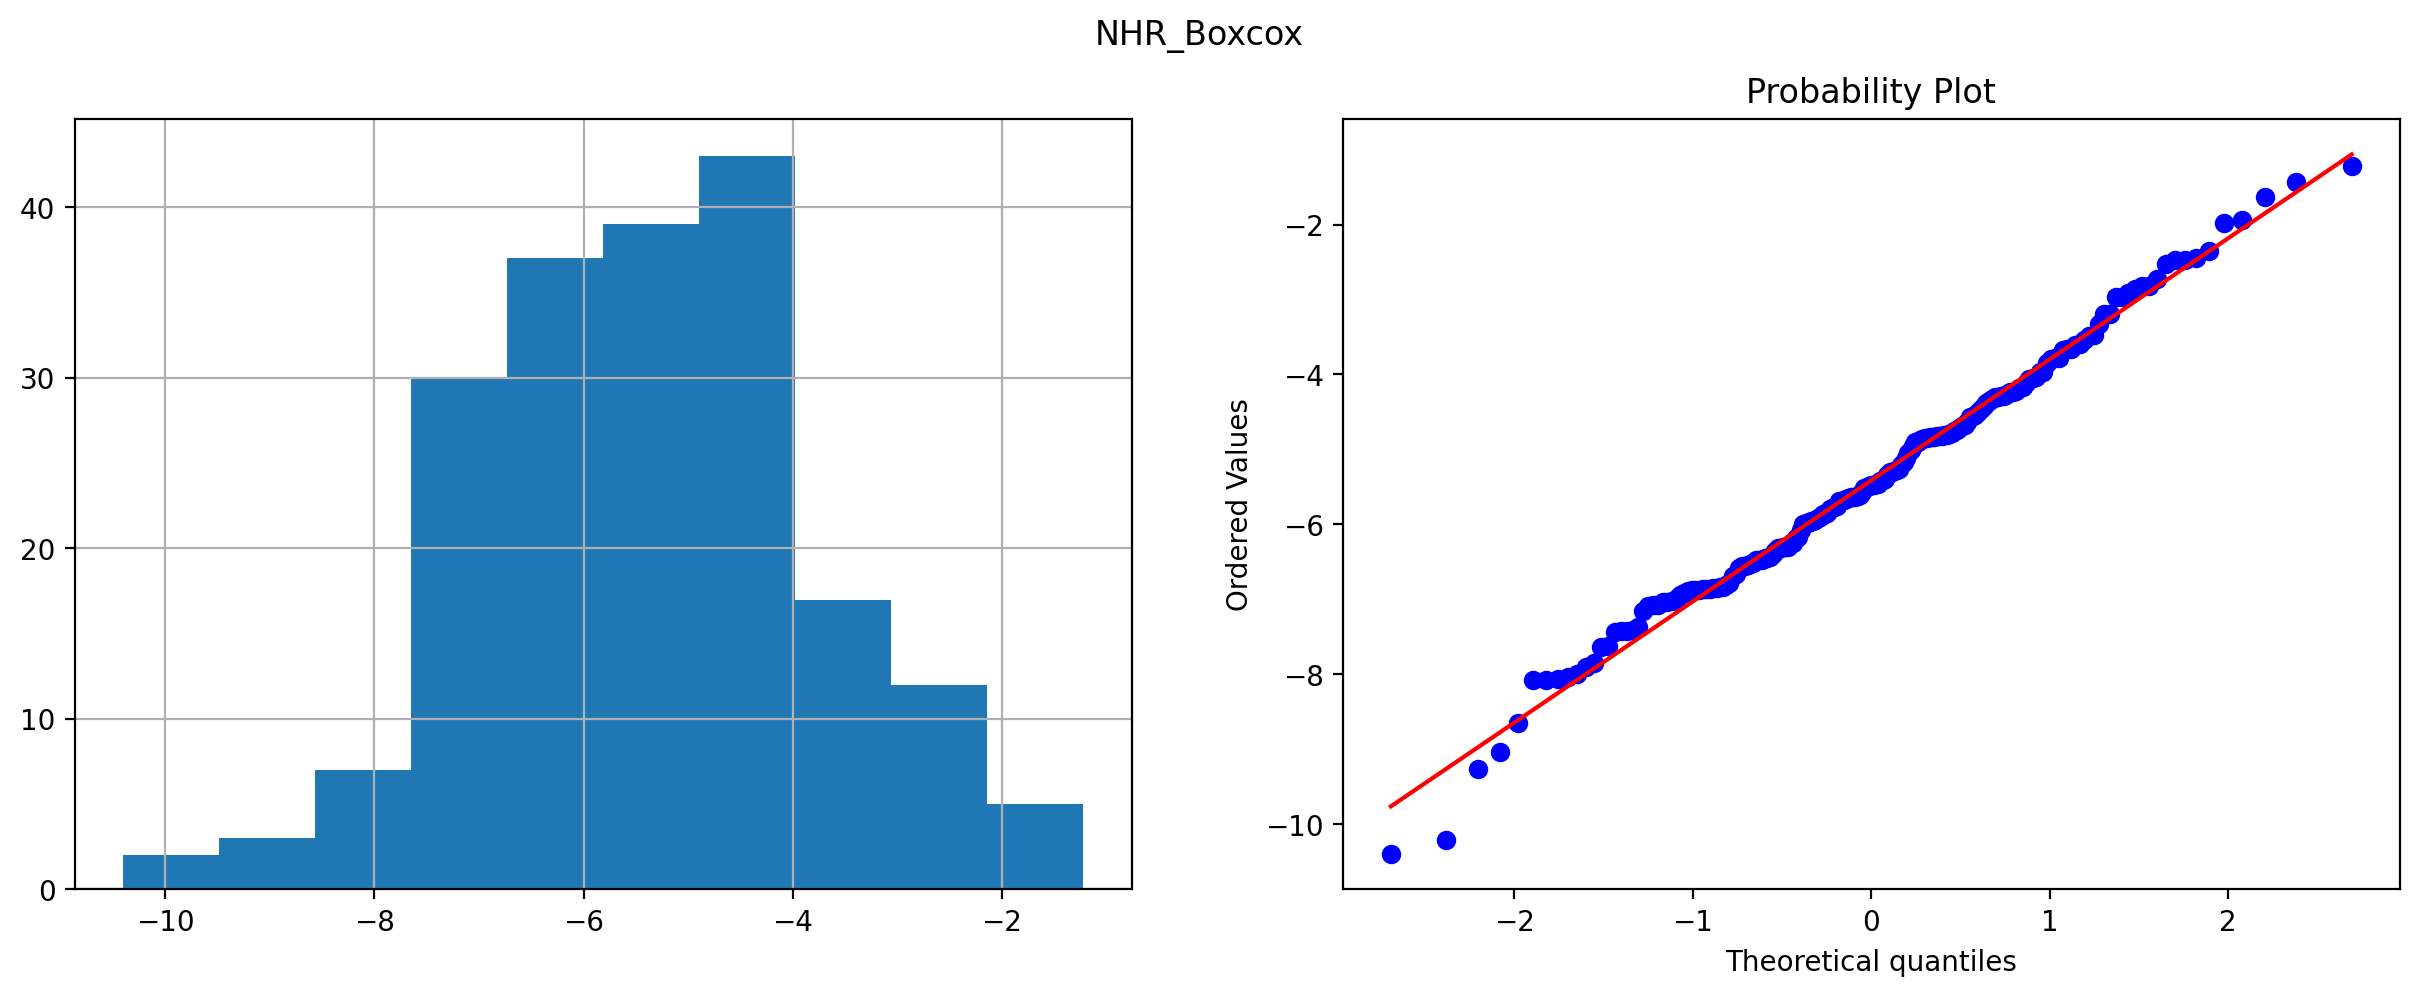

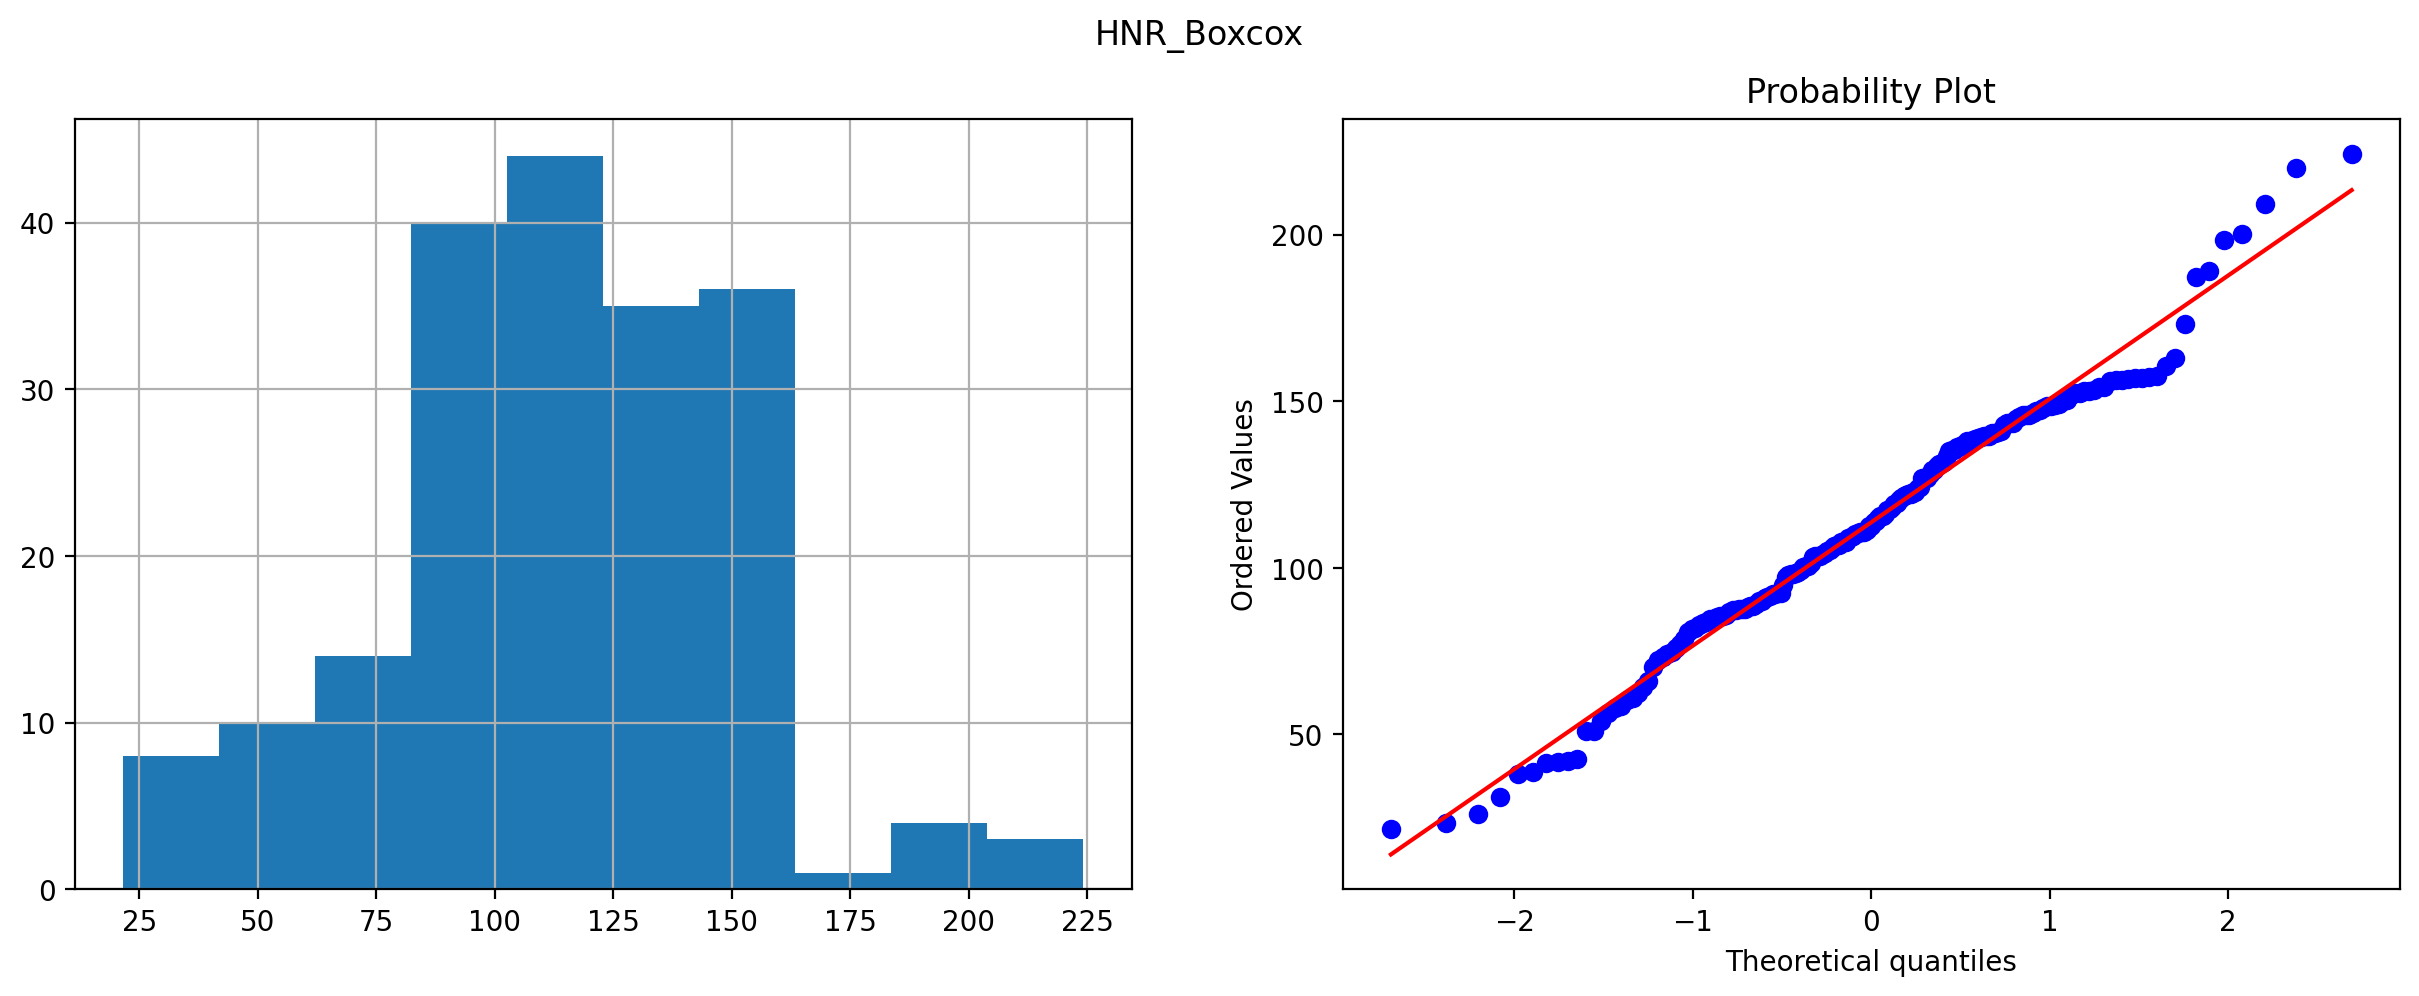

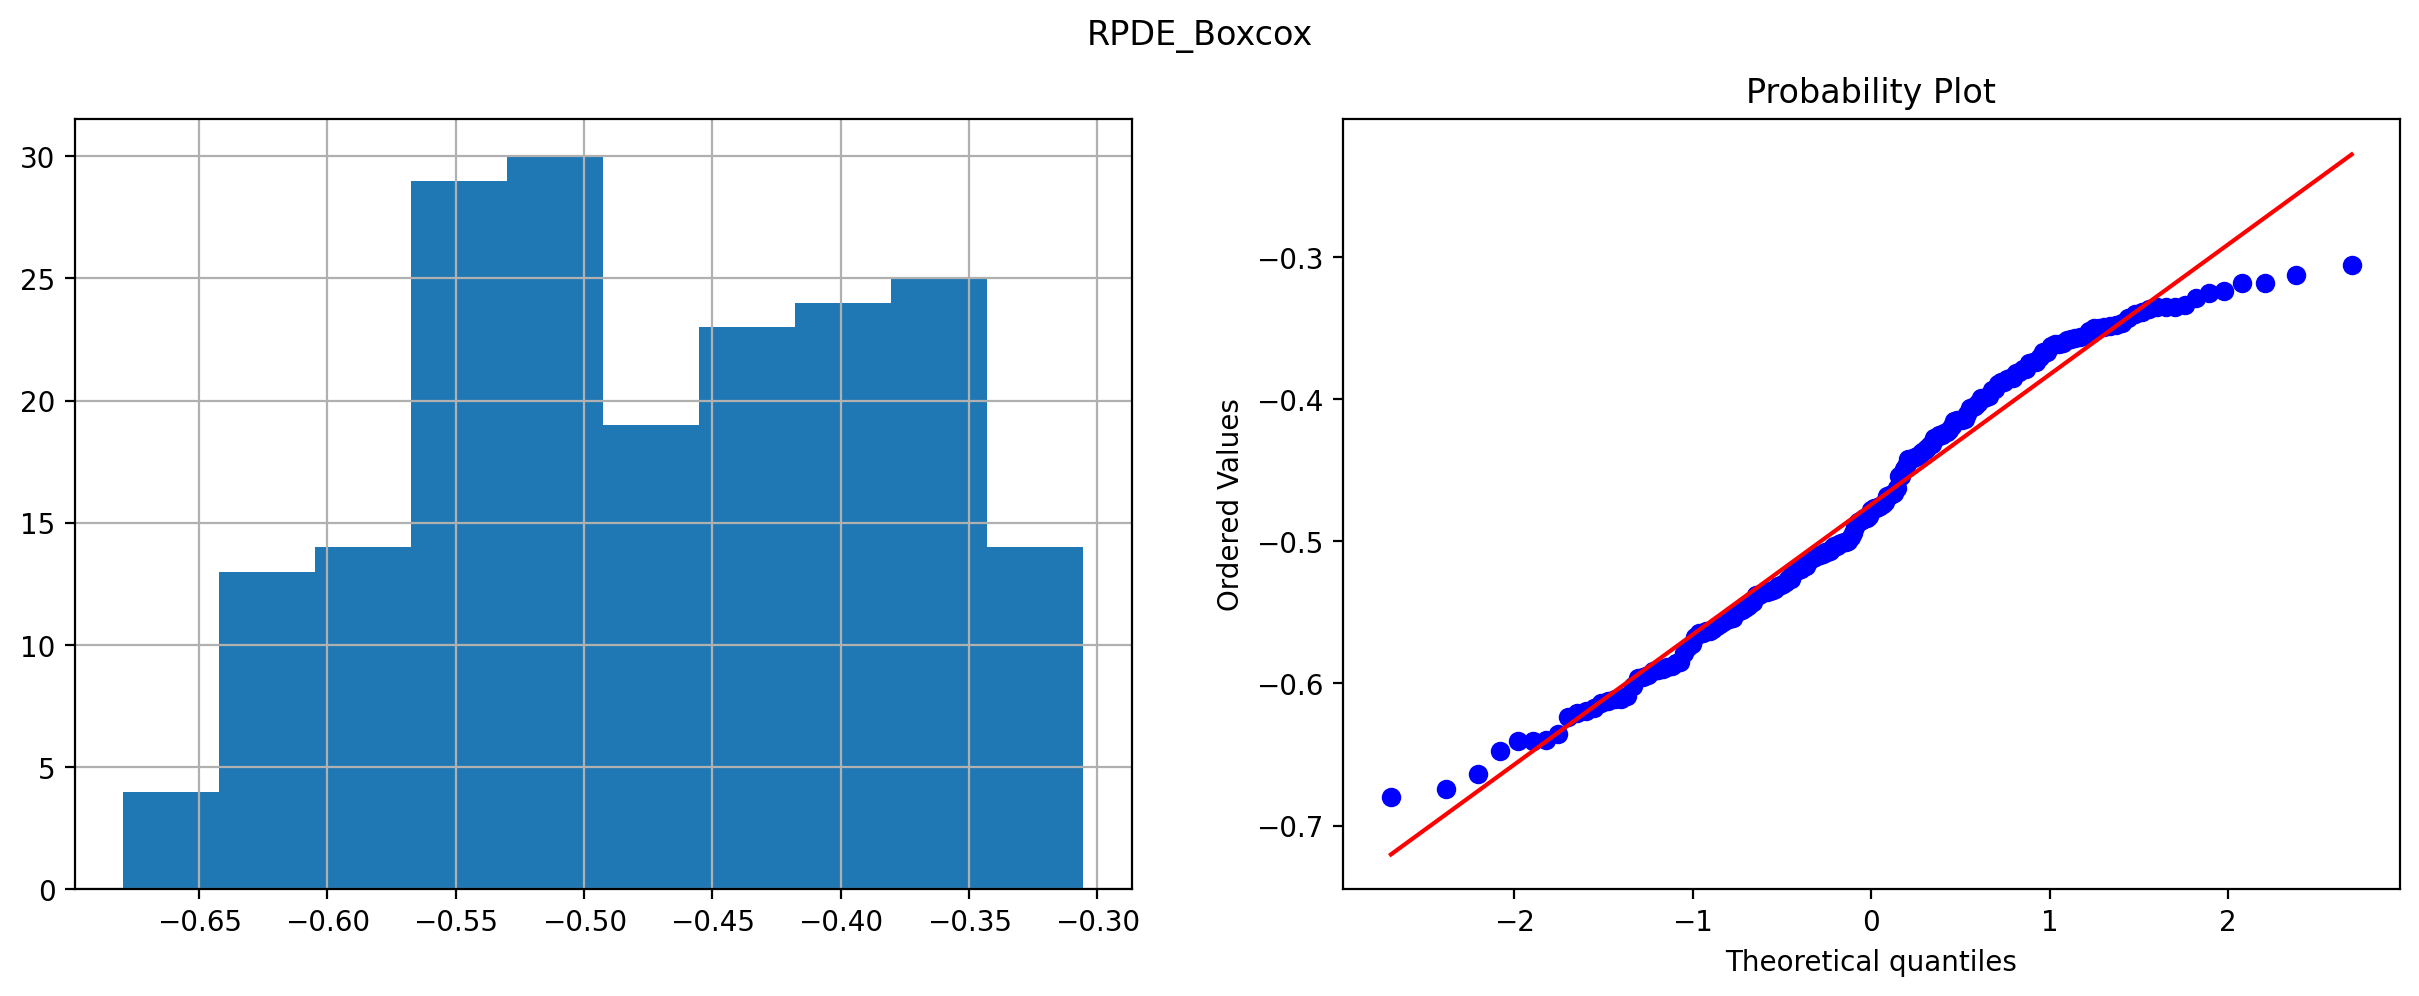

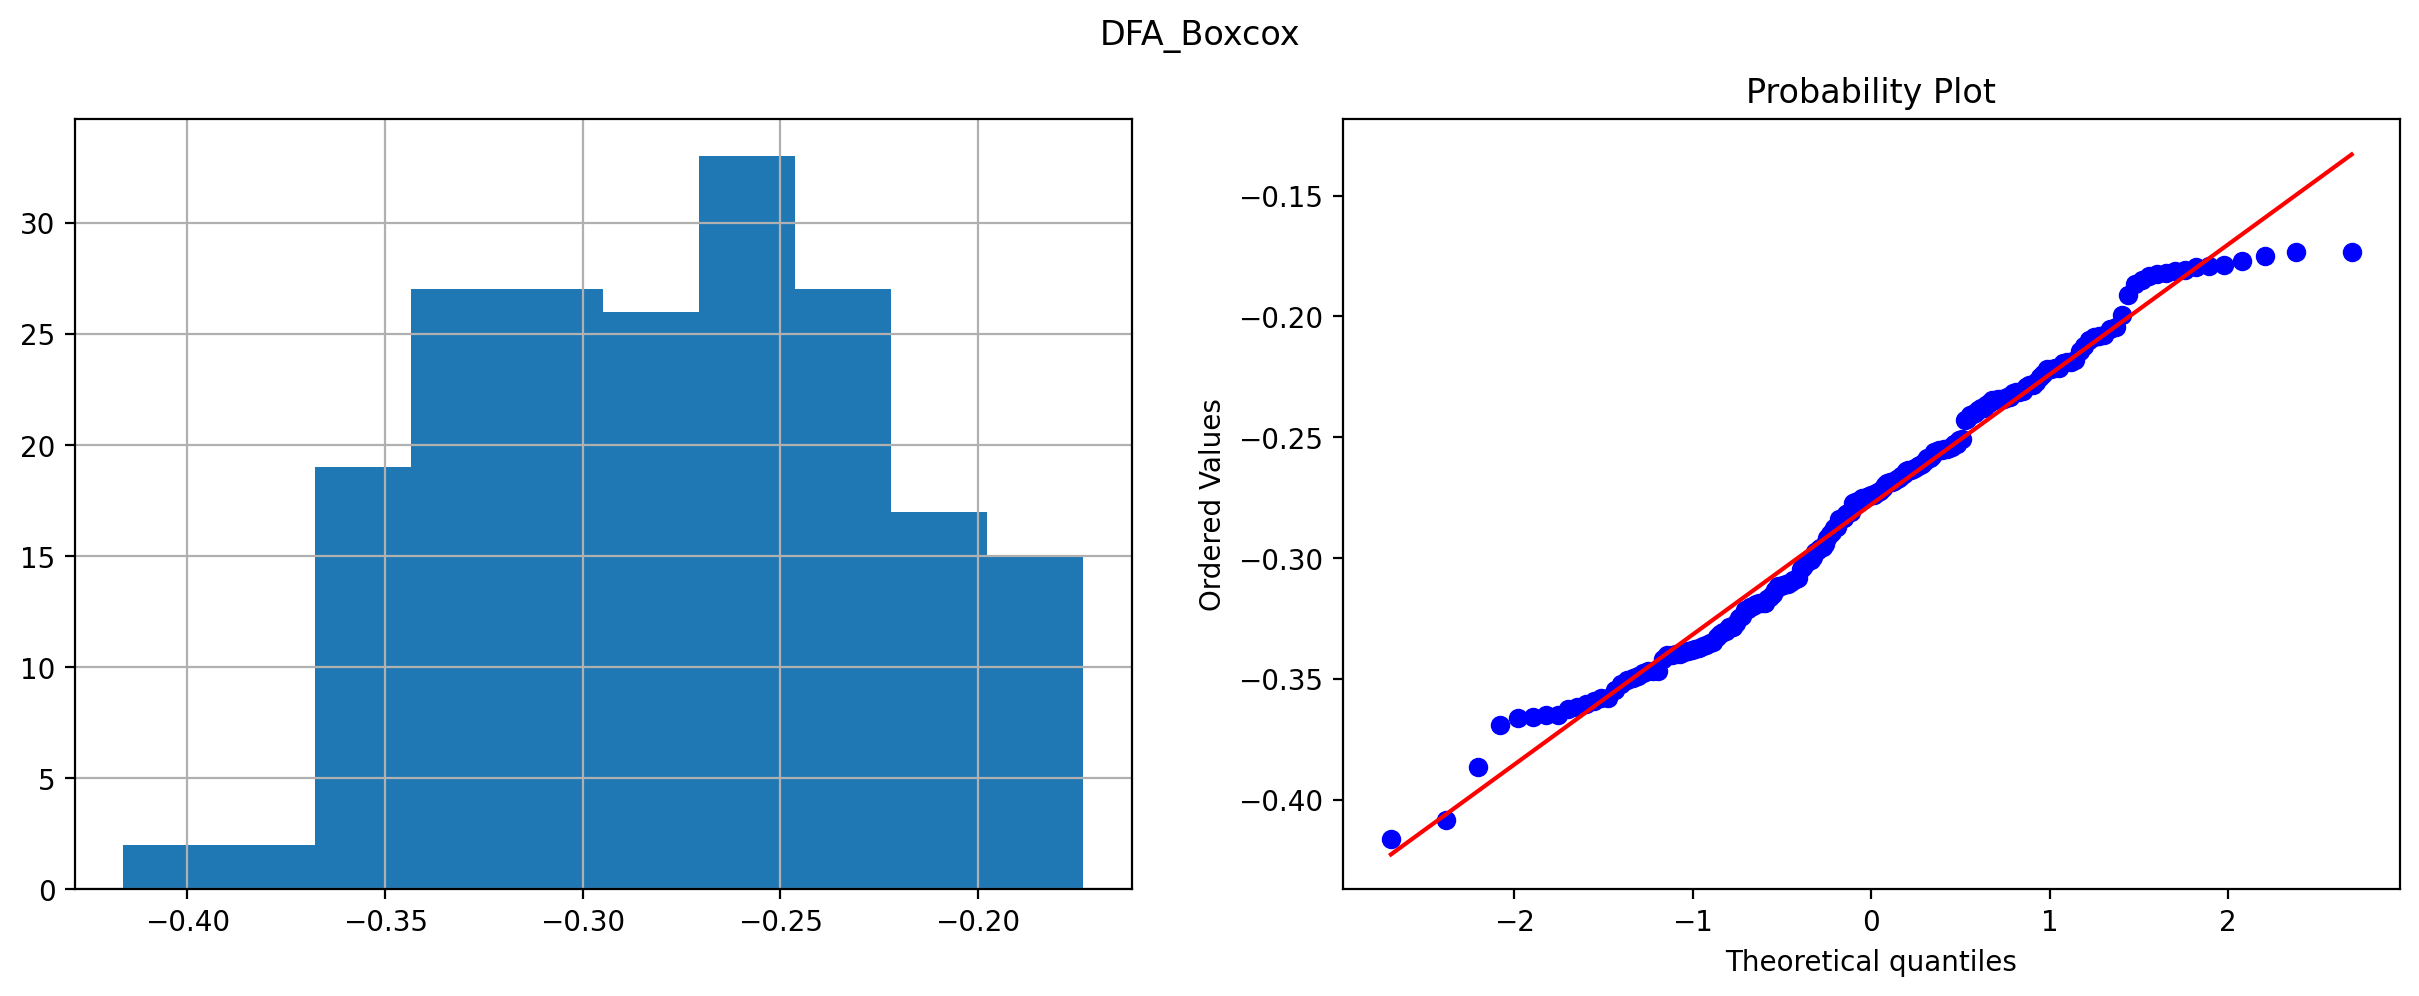

KeyError: 'spread1_Boxcox'

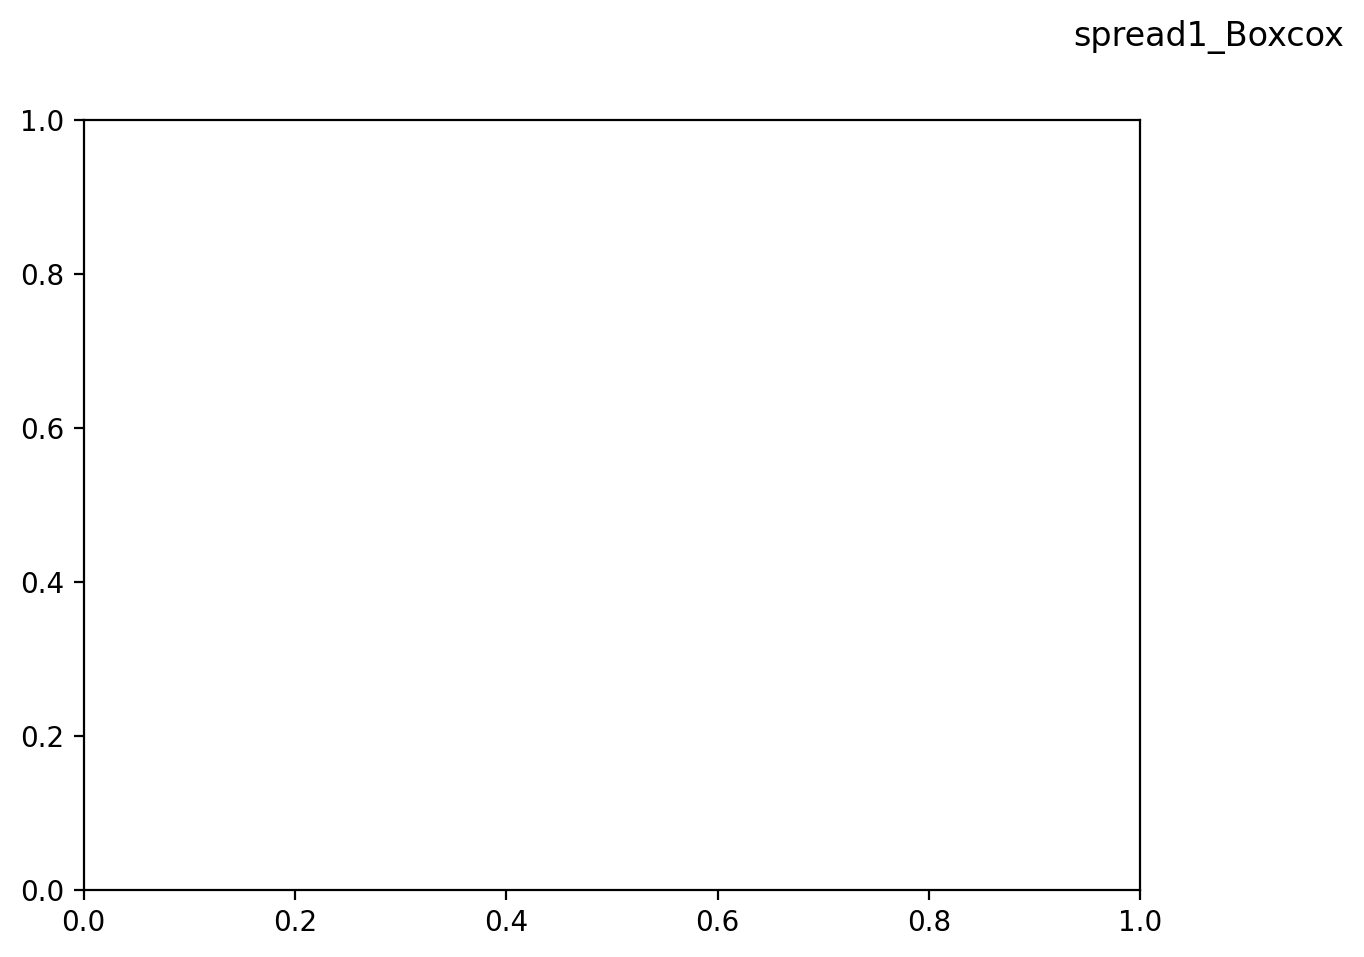

In [43]:
for i in numerical:
    plt_qq(data,i+'_Boxcox')
    

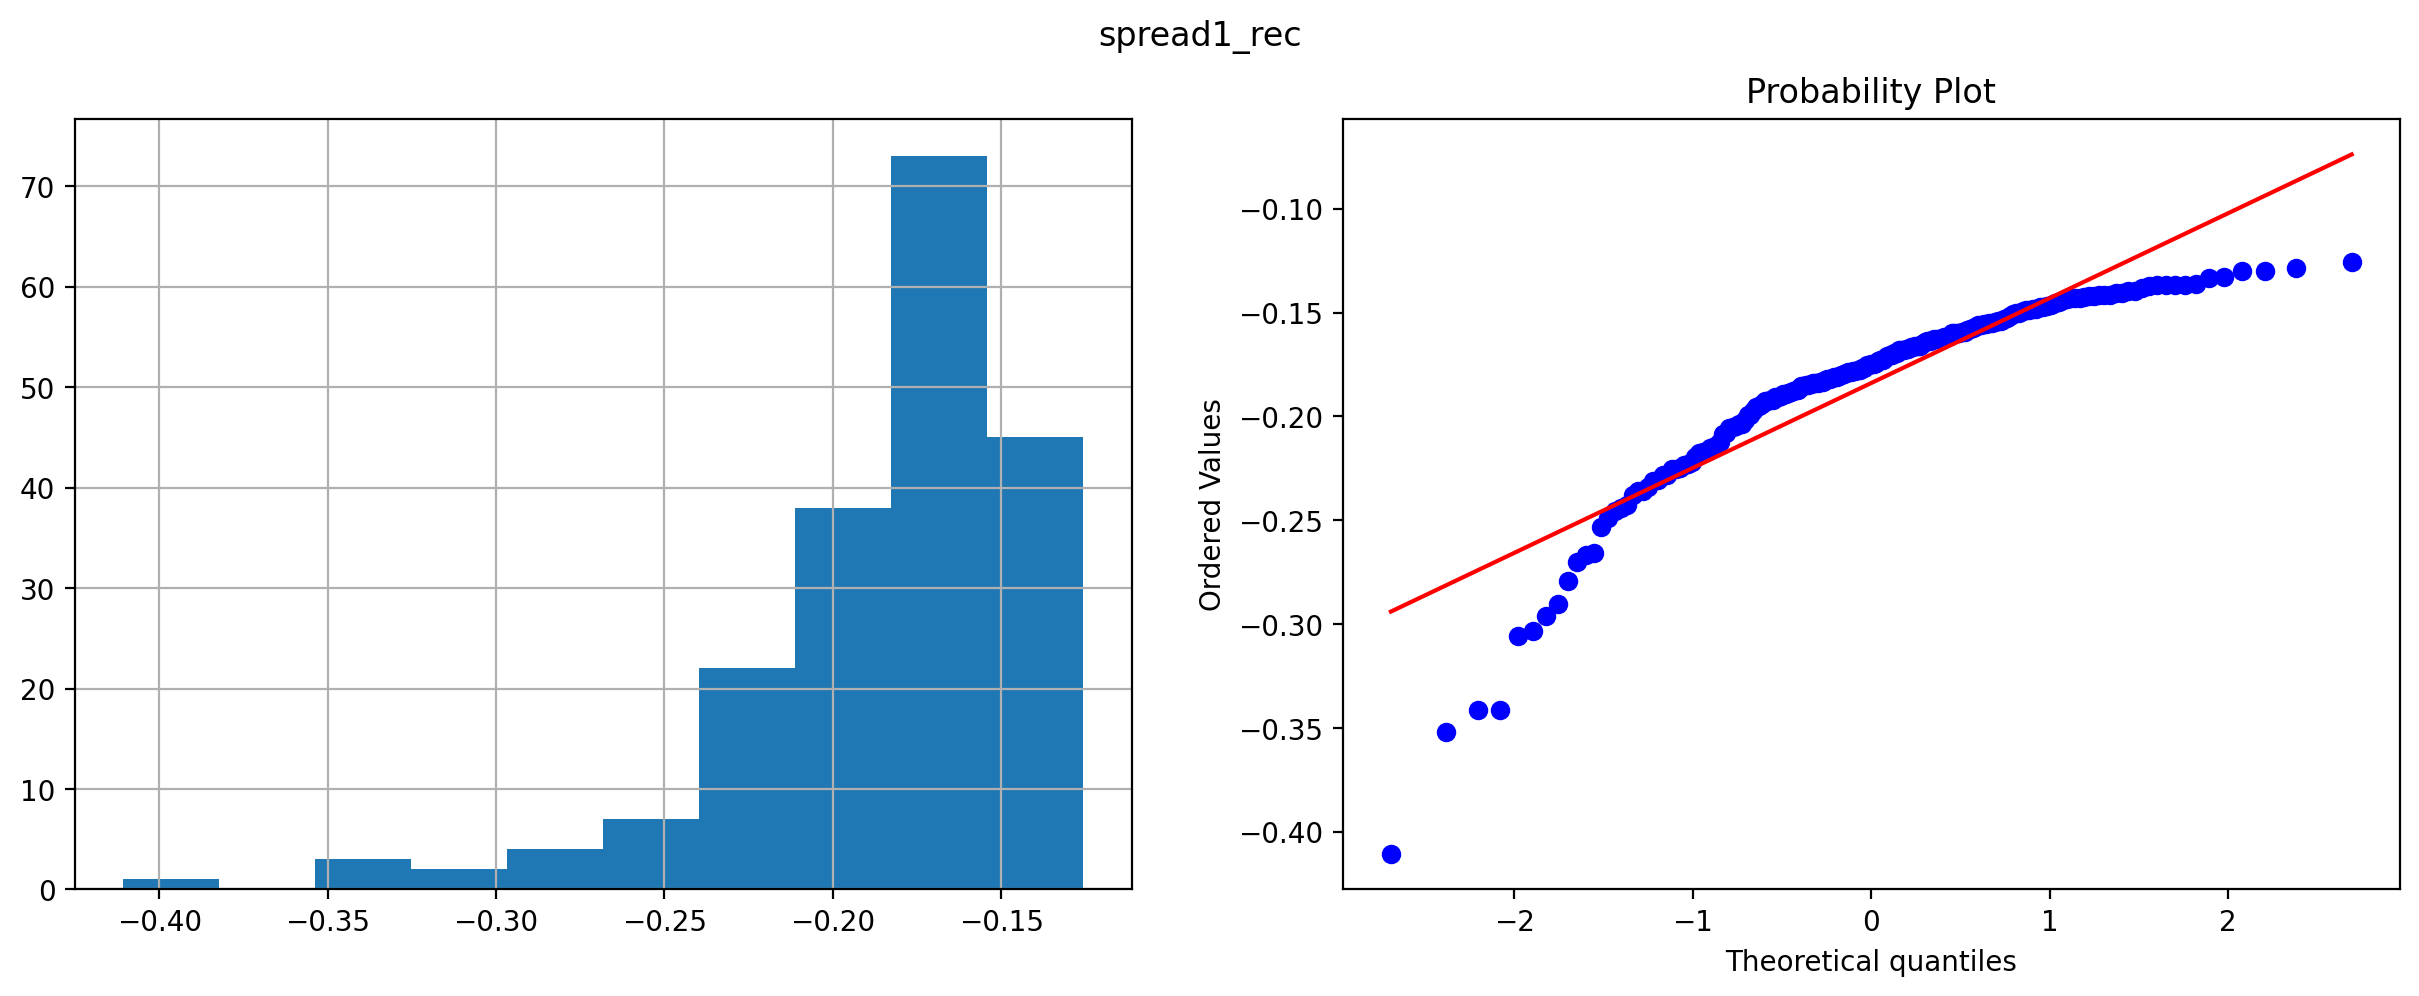

In [44]:
data['spread1_rec']=1/(data['spread1'])
plt_qq(data,'spread1_rec')

### Separating the datasets

In [45]:
transformed_data=data[['name','MDVP:Fo(Hz)_Boxcox',
       'MDVP:Fhi(Hz)_Boxcox', 'MDVP:Flo(Hz)_Boxcox', 'MDVP:Jitter(%)_Boxcox',
       'MDVP:Jitter(Abs)_Boxcox', 'MDVP:RAP_Boxcox', 'MDVP:PPQ_Boxcox',
       'Jitter:DDP_Boxcox', 'MDVP:Shimmer_Boxcox', 'MDVP:Shimmer(dB)_Boxcox',
       'Shimmer:APQ3_Boxcox', 'Shimmer:APQ5_Boxcox', 'MDVP:APQ_Boxcox',
       'Shimmer:DDA_Boxcox', 'NHR_Boxcox', 'HNR_Boxcox','status', 'RPDE_Boxcox',
       'DFA_Boxcox','spread1_rec', 'spread2_Boxcox', 'D2_Boxcox', 'PPE_Boxcox']]

In [46]:
data=data.drop(['MDVP:Fo(Hz)_Boxcox',
       'MDVP:Fhi(Hz)_Boxcox', 'MDVP:Flo(Hz)_Boxcox', 'MDVP:Jitter(%)_Boxcox',
       'MDVP:Jitter(Abs)_Boxcox', 'MDVP:RAP_Boxcox', 'MDVP:PPQ_Boxcox',
       'Jitter:DDP_Boxcox', 'MDVP:Shimmer_Boxcox', 'MDVP:Shimmer(dB)_Boxcox',
       'Shimmer:APQ3_Boxcox', 'Shimmer:APQ5_Boxcox', 'MDVP:APQ_Boxcox',
       'Shimmer:DDA_Boxcox', 'NHR_Boxcox', 'HNR_Boxcox', 'RPDE_Boxcox',
       'DFA_Boxcox', 'spread2_Boxcox', 'D2_Boxcox', 'PPE_Boxcox',
       'spread1_rec'],axis=1)

In [47]:
data.to_csv('data.csv',index=False)

In [48]:
transformed_data.to_csv('transformed_data.csv', index=False)

The transformed data is just for visualisation purposes and not for modelling.It tells us more about the kind of data distribution.

Most classification algorithms are not sensitive to outliers.


## Further goals

Building the ML model 